## Cache_Herbarium_2022-dataset-w-FFCV

Based on previous notebook: `FFCV Dataset cache playground`

Description: 

Created On: Sunday Feb 27th, 2022  
Created By: Jacob A Rose

## Extra

In [1]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from imutils.big.make_herbarium_2022_catalog_df import *

Importing imutils
ASSETS_DIR: /media/data/jacob/GitHub/image-utils/assets
SAMPLE_IMAGE_PATHS: [PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Zenobia_pulverulenta_7984 {WolfeUSGS} [1.96x].jpg'), PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Arbutus_densiflora_1440 {WolfeUSGS} [1.96x].jpg')]


In [26]:
%%time

## Can we stratify by genus or Family while classifying species?
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



def train_val_split(df: pd.DataFrame,
                    label_col = "scientificName",
                    train_size=0.7,
                    seed = 14
                    ) -> Tuple[pd.DataFrame]:

    num_samples = df.shape[0]
    # label_col = "category_id"
    x = np.arange(num_samples)
    y = df[label_col].values

    x_train, x_val, _, _ = train_test_split(x, y,
                                            stratify=y,
                                            train_size=train_size,
                                            random_state=seed)
    train_data = df.iloc[x_train,:]
    val_data = df.iloc[x_val,:]

    return train_data, val_data


def fit_and_encode_labels(train_data,
                          val_data,
                          label_col: str="scientificName"
                         ) -> Tuple[LabelEncoder, pd.DataFrame]:

    encoder = LabelEncoder()
    encoder.fit(train_data[label_col])
    train_data = train_data.assign(
        y = encoder.transform(train_data[label_col])
            ).astype({"y":"category"})
    val_data = val_data.assign(
        y = encoder.transform(val_data[label_col])
            ).astype({"y":"category"})

    return encoder, train_data, val_data


import pickle

def save_label_encoder(encoder,
                       root_dir: str,
                       label_col: str) -> str:
    label_name = f"{label_col}-encoder.pkl"
    label_encoder_path = Path(root_dir, label_name)

    with open(label_encoder_path, mode="wb") as fp:
        pickle.dump(encoder, fp)
        
    return label_encoder_path

def read_label_encoder(label_encoder_path) -> LabeEncoder:

    with open(label_encoder_path, mode="rb") as fp:
        loaded_encoder = pickle.load(fp)
        
    return loaded_encoder


def format_output_cols(df: pd.DataFrame):
    col_order = ['Species', 'path', 'y', 'category_id', 
                 'genus_id', 'institution_id', 'image_id', 'file_name',
                 'license', 'scientificName', 'family', 'genus', 'species', 'authors',
                 'collectionCode']
    return df[col_order]

In [3]:
%%time

df_train, df_test = read_all_from_csv(root_dir=DATA_DIR)

CPU times: user 6.27 s, sys: 700 ms, total: 6.97 s
Wall time: 6.97 s


In [4]:
df_train.describe(include='all')
df_test.describe(include='all')

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,Species,path
count,839772,839772,839772,839772,839772,839772,839772,839772,839772,839772,839714,839772,839772,839772
unique,2564,60,15501,839772,839772,1,15501,272,2564,6932,5346,60,15501,839772
top,422,36,2774,00000__001,000/00/00000__001.jpg,0,Carex mesochorea Mack.,Asteraceae,Carex,californica,L.,NY,Carex mesochorea,/media/data_cifs/projects/prj_fossils/data/raw...
freq,24743,304853,80,1,1,839772,80,110007,24743,4524,66632,304853,80,1


,image_id,file_name,license,path
count,210407,210407,210407,210407
unique,210407,210407,1,210407
top,0,000/test-000000.jpg,0,/media/data_cifs/projects/prj_fossils/data/raw...
freq,1,1,210407,1


In [26]:
label_col = "scientificName"
train_size=0.7
seed = 14

train_data, val_data = train_val_split(df=df_train,
                                       label_col=label_col,
                                       train_size=train_size,
                                       seed=seed)
    
encoder, train_data, val_data = fit_and_encode_labels(train_data,
                                                      val_data,
                                                      label_col=label_col)

label_encoder_path = save_label_encoder(encoder=encoder,
                                        label_col=label_col)

train_data = format_output_cols(train_data)
val_data = format_output_cols(val_data)

# train_data = train_data[col_order]
# val_data = val_data[col_order]


        
# with open(label_encoder_path, mode="rb") as fp:
#     loaded_encoder = pickle.load(fp)

len(loaded_encoder.classes_)
len(encoder.classes_)

In [38]:
# %%time

# ## Can we stratify by genus or Family while classifying species?
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder


# num_samples = df_train.shape[0]
# # label_col = "category_id"
# label_col = "scientificName"

# train_size=0.7
# seed = 14

# x = np.arange(num_samples)
# y = df_train[label_col].values

# x_train, x_val, _, _ = train_test_split(x, y,
#                                         stratify=y,
#                                         train_size=train_size,
#                                         random_state=seed)
# train_data = df_train.iloc[x_train,:]
# val_data = df_train.iloc[x_val,:]
# # train_data.shape[0] + val_data.shape[0]


# encoder = LabelEncoder()
# encoder.fit(train_data[label_col])
# train_data = train_data.assign(
#     y = encoder.transform(train_data[label_col])
#         ).astype({"y":"category"})
# val_data = val_data.assign(
#     y = encoder.transform(val_data[label_col])
#         ).astype({"y":"category"})



# col_order = ['Species', 'path', 'y', 'category_id', 
#              'genus_id', 'institution_id', 'image_id', 'file_name',
#              'license', 'scientificName', 'family', 'genus', 'species', 'authors',
#              'collectionCode']

# train_data = train_data[col_order]
# val_data = val_data[col_order]

CPU times: user 3 s, sys: 168 ms, total: 3.17 s
Wall time: 3.16 s


In [ ]:
    
p = encoder.classes_
p

d = train_data.value_counts(["scientificName", "category_id", "y"])
# d = train_data.value_counts("category_id")
# d = train_data.value_counts("scientificName")
d

dd = pd.DataFrame(d.reset_index(drop=False))

dd

p = encoder.classes_
p

In [7]:
from deepchecks import Dataset

# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred
# If the dataset has categorical features, the best practice is to pass a list with their names

ds_train = Dataset(train_data, label=label_col, cat_features=[])
ds_val =  Dataset(val_data,  label=label_col, cat_features=[])

from deepchecks import suites

In [10]:
%%time

# from deepchecks.suites import single_dataset_integrity
# from deepchecks.tabular.checks import TrainTestCheck, TrainTestLabelDrift

from deepchecks.tabular.suites import (single_dataset_integrity,
                                       train_test_leakage,
                                       train_test_validation)

suite_name = "single_dataset_integrity"
suite = single_dataset_integrity

train_data_suite = suite()
train_data_suite_result = train_data_suite.run(ds_train)

val_data_suite = suite()
val_data_suite_result = val_data_suite.run(ds_val)

Single Dataset Integrity Suite:   0%|          | 0/8 [00:00<?, ? Check/s]

Single Dataset Integrity Suite:   0%|          | 0/8 [00:00<?, ? Check/s]

CPU times: user 5min 5s, sys: 7.41 s, total: 5min 12s
Wall time: 5min 11s


In [11]:
train_data_suite_result.save_as_html(Path(DATA_DIR, f'train-data_deepchecks-{suite_name}.html'))

In [12]:
val_data_suite_result.save_as_html(Path(DATA_DIR, f'val-data_deepchecks-{suite_name}.html'))

In [13]:
%%time

suite_name = "train_test_validation"
suite = train_test_validation

train_val_data_suite = suite()
train_val_data_suite_result = train_val_data_suite.run(train_dataset=ds_train,
                                               test_dataset=ds_val)
train_val_data_suite_result.save_as_html(Path(DATA_DIR, f'train_val-data_deepchecks-{suite_name}.html'))

Train Test Validation Suite:   0%|          | 0/14 [00:00<?, ? Check/s]

CPU times: user 33.9 s, sys: 1.44 s, total: 35.4 s
Wall time: 35.3 s


# True End

In [3]:
# %%time

# import os
# from typing import *
# import json
# import pandas as pd
# from pathlib import Path
# import seaborn as sns
# import matplotlib.pyplot as plt
# from pprint import pprint

# HERBARIUM_ROOT = "/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize"
# # OUTPUT_DIR = "/media/data/jacob/GitHub/image-utils/notebooks/herbarium_2022/plots"

# WORKING_DIR = "/media/data/jacob/GitHub/image-utils/notebooks/herbarium_2022/"
# OUTPUT_DIR = os.path.join(WORKING_DIR, "outputs")
# DATA_DIR = os.path.join(WORKING_DIR, "data")

# os.makedirs(OUTPUT_DIR, exist_ok=True)
# os.makedirs(DATA_DIR, exist_ok=True)

# TRAIN_KEYS = ['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license']
# TEST_KEYS = ['image_id', 'file_name', 'license']


# def optimize_dtypes_train(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Convert column dtypes to optimal type for herbarium train metadata df.
#     """

# # Reduce total df size by optimizing dtypes per column
#     cat_cols = ['genus_id', 'institution_id', 'category_id',
#                 'scientificName', 'family', 'genus', 'species','Species',
#                 'collectionCode', 'license', 'authors']
#     str_cols = ['image_id', 'file_name', 'path']
#     col_dtypes = {c:"category" for c in cat_cols}
#     col_dtypes.update({c:"string" for c in str_cols})

#     # df = df.convert_dtypes()
#     df = df.astype(col_dtypes)
#     return df


# def optimize_dtypes_test(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Convert column dtypes to optimal type for herbarium test metadata df.
#     """    
#     # Reduce total df size by optimizing dtypes per column
#     df = df.astype({'image_id':"string",
#                     'file_name':"string",
#                     'license':"category",
#                     'path':"string"})
#     return df


# def read_train_df_from_csv(train_path,
#                       nrows: Optional[int]=None
#                      ) -> pd.DataFrame:
    
#     df = pd.read_csv(train_path, index_col=0, nrows=nrows)
#     df = optimize_dtypes_train(df)
#     return df


# def read_test_df_from_csv(test_path,
#                      nrows: Optional[int]=None
#                     ) -> pd.DataFrame:
    
#     df = pd.read_csv(test_path, index_col=0, nrows=nrows)
#     df = optimize_dtypes_test(df)
#     return df


# def read_all_from_csv(root_dir: str) -> Tuple[pd.DataFrame]:
#     """
#     Read the train_metadata.csv and test_metadata.csv files from `root_dir`
#     """
#     train_path = Path(root_dir, "train_metadata.csv")
#     test_path = Path(root_dir, "test_metadata.csv")
    
#     train_df = read_train_df_from_csv(train_path,nrows=nrows)
#     test_df = read_test_df_from_csv(test_path,nrows=nrows)

#     return train_df, test_df
    

# ###################################
# ###################################


# def herbarium_train_metadata2df(root_dir: str) -> pd.DataFrame:

#     metadata_path = Path(HERBARIUM_ROOT, "train_metadata.json")
    
#     with open(os.path.join(metadata_path)) as fp:
#         train_data = json.load(fp)
    
#     assert all([k in train_data.keys() for k in TRAIN_KEYS])
    
#     train_annotations = pd.DataFrame(train_data['annotations'])

#     train_categories = pd.DataFrame(train_data['categories']).set_index("category_id")
#     train_genera = pd.DataFrame(train_data['genera']).set_index("genus_id")
#     train_institutions = pd.DataFrame(train_data['institutions']).set_index("institution_id")
#     train_images = pd.DataFrame(train_data['images']).set_index("image_id")

#     df_train = pd.merge(train_annotations, train_images, how="left", right_index=True, left_on="image_id")
#     df_train = pd.merge(df_train, train_categories, how="left", right_index=True, left_on="category_id")
#     df_train = pd.merge(df_train, train_institutions, how="left", right_index=True, left_on="institution_id")
#     # df_train = pd.merge(df_train, train_genera, how="left", right_index=True, left_on="genus_id")

#     df_train = df_train.assign(
#         Species = df_train.apply(lambda x: " ".join([x.genus, x.species]), axis=1),
#         path=df_train.file_name.apply(lambda x: str(Path(root_dir, "train_images", x)))
#     )
    
#     df_train = optimize_dtypes_train(df_train)
    
#     print(f"training images: {len(df_train)}")
    
#     return df_train


# def herbarium_test_metadata2df(root_dir: str) -> pd.DataFrame:

#     metadata_path = Path(HERBARIUM_ROOT, "test_metadata.json")
    
#     with open(os.path.join(metadata_path)) as fp:
#         test_data = json.load(fp)
    
#     assert all([k in test_data[0].keys() for k in TEST_KEYS])    
    
#     df_test = pd.DataFrame(test_data)

#     df_test = df_test.assign(path=df_test.file_name.apply(lambda x: str(Path(root_dir, "test_images", x))))
    
#     df_test = optimize_dtypes_test(df_test)
#     print(f"test images: {len(df_test)}")

#     return df_test




# def extract_train_test_metadata(root_dir: str):

#     df_train = herbarium_train_metadata2df(root_dir)
#     df_test = herbarium_test_metadata2df(root_dir)
                             
#     return df_train, df_test

# def write_herbarium_metadata2disk(root_dir: str, output_dir: str=None) -> Tuple[Path]:
#     """
#     Reads json metadata files from `root_dir`, parses into train & test dataframes, then writes to disk as csv files.
#     """
#     assert os.path.isdir(output_dir)
    
#     # df_train, df_test = extract_train_test_metadata(root_dir = root_dir)
#     train_path = Path(output_dir, "train_metadata.csv")
#     test_path = Path(output_dir, "test_metadata.csv")
    
#     # try:
#     if os.path.exists(train_path):
#         print(train_path, "already exists, skipping write process.",
#               "Delete the existing file if intention is to refresh dataset.")
#         print(f"Reading train data from: {train_path}")
#         df_train = read_train_df_from_csv(train_path)
#     else:
#         df_train = herbarium_train_metadata2df(root_dir)
#         df_train.to_csv(train_path)

#     if os.path.exists(test_path):
#         print(test_path, "already exists, skipping write process.",
#               "Delete the existing file if intention is to refresh dataset.")
#         print(f"Reading test data from: {test_path}")
#         df_test = read_test_df_from_csv(test_path)
#     else:
#         df_test = herbarium_test_metadata2df(root_dir)
#         df_test.to_csv(test_path)

#     return train_path, test_path


# # df_train, df_test = extract_train_test_metadata(root_dir = HERBARIUM_ROOT)

# train_path, test_path = write_herbarium_metadata2disk(root_dir=HERBARIUM_ROOT,
#                               output_dir=DATA_DIR)


# train_df, test_df = read_all_from_csv(root_dir=HERBARIUM_ROOT)

# print(os.listdir(DATA_DIR))

training images: 839772
test images: 210407
['.ipynb_checkpoints', 'train_metadata.csv', 'test_metadata.csv']
CPU times: user 1min 9s, sys: 7.17 s, total: 1min 16s
Wall time: 1min 19s


In [16]:
# df_train, df_test = extract_train_test_metadata(root_dir = HERBARIUM_ROOT)

# df_train = herbarium_train_metadata2df(root_dir)
# df_test = herbarium_test_metadata2df(root_dir)

# output_dir=DATA_DIR
# train_path = Path(output_dir, "train_metadata.csv")
# test_path = Path(output_dir, "test_metadata.csv")

In [5]:
# def read_train_df_from_csv(train_path,
#                       nrows: Optional[int]=None
#                      ) -> pd.DataFrame:
    
#     df = pd.read_csv(train_path, index_col=0, nrows=nrows)
#     df = optimize_dtypes_train(df)
#     return df


# def read_test_df_from_csv(test_path,
#                      nrows: Optional[int]=None
#                     ) -> pd.DataFrame:
    
#     df = pd.read_csv(test_path, index_col=0, nrows=nrows)
#     df = optimize_dtypes_test(df)
#     return df

nrows=None

train_df = read_train_df_from_csv(train_path,nrows=nrows)
test_df = read_test_df_from_csv(test_path,nrows=nrows)

train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 839772 entries, 0 to 839771
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   genus_id        839772 non-null  category
 1   institution_id  839772 non-null  category
 2   category_id     839772 non-null  category
 3   image_id        839772 non-null  string  
 4   file_name       839772 non-null  string  
 5   license         839772 non-null  category
 6   scientificName  839772 non-null  category
 7   family          839772 non-null  category
 8   genus           839772 non-null  category
 9   species         839772 non-null  category
 10  authors         839714 non-null  category
 11  collectionCode  839772 non-null  category
 12  Species         839772 non-null  category
 13  path            839772 non-null  string  
dtypes: category(11), string(3)
memory usage: 43.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210407 entries, 0 to 210406
Data 

In [25]:
df.describe(include='all')
df


df = pd.read_csv(test_path, index_col=0)
df = optimize_dtypes_test(df)

df.head(5)
df.info()


In [12]:
df_test = df_test.astype({'image_id':"string",
                          'file_name':"string",
                          'license':"category",
                          'path':"string"})
df_test.info()

cat_cols = ['genus_id', 'institution_id', 'category_id',
            'scientificName', 'family', 'genus', 'species',
            'collectionCode', 'license', 'authors']
str_cols = ['image_id', 'file_name', 'path']
col_dtypes = {c:"category" for c in cat_cols}
col_dtypes.update({c:"string" for c in str_cols})

df_train = df_train.convert_dtypes()
df_train = df_train.astype(col_dtypes)

df_train.info()

In [6]:
df_test.describe(include='all')

,image_id,file_name,license,path
count,210407,210407,210407,210407
unique,210407,210407,1,210407
top,0,000/test-000000.jpg,0,/media/data_cifs/projects/prj_fossils/data/raw...
freq,1,1,210407,1


In [11]:
from PIL import Image
sample = df_test.sample(1)#.path
img_path = sample.path.item()
img = Image.open(img_path)
img

### Key constants

In [1]:
DATASETS_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images"
EXTANT_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/original/full/jpg"
GENERAL_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Fossil/General_Fossil/original/full/jpg"
FLORISSANT_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Fossil/Florissant_Fossil/original/full/jpg"

HERBARIUM_ROOT = "/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize"



OUTPUT_DIR = "/media/data/jacob/GitHub/image-utils/notebooks/herbarium_2022/plots"
# DATA_CACHE_DIR = "/media/data/jacob/GitHub/image-utils/notebooks/herbarium_2022/data"


DATA_CACHE_DIR = "/media/data_cifs/projects/prj_fossils/users/jacob/data/herbarium_2022/ffcv"

In [7]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

sns.set()

with open(os.path.join(HERBARIUM_ROOT, "train_metadata.json")) as fp:
    train_data = json.load(fp)

with open(os.path.join(HERBARIUM_ROOT, "test_metadata.json")) as fp:
    test_data = json.load(fp)

pprint(train_data.keys())
pprint(len(test_data))

for k,v in train_data.items():
    print(k, f"| Total:{len(v)}")
    print("First:", v[0])
    print("Last:", v[-1])
    print("="*15+"\n")

assert len(train_data["annotations"]) == len(train_data["images"])

train_annotations = pd.DataFrame(train_data['annotations'])
display(train_annotations.head(3))
import seaborn as sns
cm = sns.color_palette("Dark2")
sns.set_theme(palette=cm)

train_data.keys()

from pprint import pprint as pp
test_data[0].keys()

from pathlib import Path
root_dir = HERBARIUM_ROOT
df_test = pd.DataFrame(test_data)
df_test = df_test.assign(path=df_test.file_name.apply(lambda x: str(Path(root_dir, "test_images", x))))

df_test.head(5)
df_test.tail(5)

for k,v in train_data.items():
    pp([k, v[0]])

test_data[0]

axs = train_annotations[["genus_id", "institution_id", "category_id"]].hist(bins=100, alpha=0.6, sharey=True, figsize=(8, 8), grid=True, layout=(3, 1))
_= [ax.set_yscale('log') for ax in axs[0]]
plt.legend()

train_categories = pd.DataFrame(train_data['categories']).set_index("category_id")
display(train_categories.head())

train_genera = pd.DataFrame(train_data['genera']).set_index("genus_id")
display(train_genera.head())

train_institutions = pd.DataFrame(train_data['institutions']).set_index("institution_id")
display(train_institutions.head())

train_images = pd.DataFrame(train_data['images']).set_index("image_id")
display(train_images.head())

train_distances = pd.DataFrame(train_data['distances'])
display(train_distances.head())

fig = plt.figure(figsize=(18, 18))
heat = train_distances.pivot(index="genus_id_y", columns="genus_id_x", values="distance")
_= sns.heatmap(heat, ax=fig.gca())

df_train = pd.merge(train_annotations, train_images, how="left", right_index=True, left_on="image_id")
df_train = pd.merge(df_train, train_categories, how="left", right_index=True, left_on="category_id")
df_train = pd.merge(df_train, train_institutions, how="left", right_index=True, left_on="institution_id")
# df_train = pd.merge(df_train, train_genera, how="left", right_index=True, left_on="genus_id")

display(df_train.head())
print(f"training images: {len(df_train)}")

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,path
473391,1443,38,8723,08723__074,087/23/08723__074.jpg,0,Lupinus chamissonis Eschsch.,Fabaceae,Lupinus,chamissonis,Eschsch.,P,/media/data_cifs/projects/prj_fossils/data/raw...
674980,2053,52,12454,12454__049,124/54/12454__049.jpg,0,Rhododendron arborescens (Pursh) Torr.,Ericaceae,Rhododendron,arborescens,(Pursh) Torr.,US,/media/data_cifs/projects/prj_fossils/data/raw...
791827,2412,21,14601,14601__014,146/01/14601__014.jpg,0,Torreya taxifolia Arn.,Taxaceae,Torreya,taxifolia,Arn.,GH,/media/data_cifs/projects/prj_fossils/data/raw...
168998,458,24,3211,03211__071,032/11/03211__071.jpg,0,Ceanothus velutinus Douglas ex Hook.,Rhamnaceae,Ceanothus,velutinus,Douglas ex Hook.,ID,/media/data_cifs/projects/prj_fossils/data/raw...
629908,1911,36,11639,11639__104,116/39/11639__104.jpg,0,Poa laxa Haenke,Poaceae,Poa,laxa,Haenke,NY,/media/data_cifs/projects/prj_fossils/data/raw...
359686,1021,52,6675,06675__018,066/75/06675__018.jpg,0,Gentiana nivalis L.,Gentianaceae,Gentiana,nivalis,L.,US,/media/data_cifs/projects/prj_fossils/data/raw...
634998,1924,36,11735,11735__065,117/35/11735__065.jpg,0,Polygala sanguinea L.,Polygalaceae,Polygala,sanguinea,L.,NY,/media/data_cifs/projects/prj_fossils/data/raw...
87746,227,36,1702,01702__004,017/02/01702__004.jpg,0,Atriplex parishii S.Watson,Amaranthaceae,Atriplex,parishii,S.Watson,NY,/media/data_cifs/projects/prj_fossils/data/raw...
795603,2422,57,14675,14675__090,146/75/14675__090.jpg,0,Trautvetteria caroliniensis (Walter) Vail,Ranunculaceae,Trautvetteria,caroliniensis,(Walter) Vail,WCW,/media/data_cifs/projects/prj_fossils/data/raw...
145919,422,33,2791,02791__021,027/91/02791__021.jpg,0,Carex nardina (Hornem.) Fr.,Cyperaceae,Carex,nardina,(Hornem.) Fr.,MONTU,/media/data_cifs/projects/prj_fossils/data/raw...


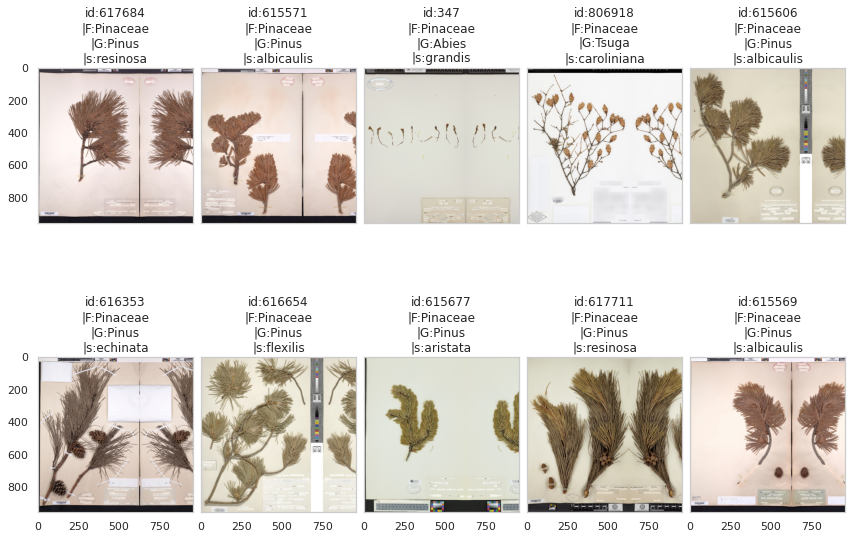

In [9]:
df_train = df_train.assign(path=df_train.file_name.apply(lambda x: os.path.join(HERBARIUM_ROOT, "train_images", x)))

df_train = df_train.sample(frac=1)


# df = df_train[:10]

df = df_train[df_train.family=="Pinaceae"][:10]


sns.set_style("whitegrid", {'axes.grid' : False})
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.flatten()
for i, (idx, row) in enumerate(df.iterrows()):
    img_path = row["path"]
#     img_path = os.path.join(PATH_DATASET, "train_images", row["file_name"])
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"id:{idx}"+"\n"+f"|F:{row['family']}"+"\n"+f"|G:{row['genus']}"+"\n"+f"|s:{row['species']}")
fig.tight_layout()

plt.subplots_adjust(hspace=0.2, wspace=0.05)
display(df_train[:10])

In [9]:
dir()

# !pip install more_itertools
# !pip install omegaconf
# !pip install hydra-core --upgrade --pre
# !pip install modin
# !pip install munch
# !pip install scikit-image


In [11]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from imutils.utils.dataset_management_utils import Extract


Importing imutils
ASSETS_DIR: /media/data/jacob/GitHub/image-utils/assets
SAMPLE_IMAGE_PATHS: [PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Zenobia_pulverulenta_7984 {WolfeUSGS} [1.96x].jpg'), PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Arbutus_densiflora_1440 {WolfeUSGS} [1.96x].jpg')]


In [12]:
import numpy as np

def plot_class_counts(df,
                      y_col="Family",
                      ax=None,
                      figsize=(25,10),
                      alpha: int=0.8,
                      hue: str=None,
                      ticklabel_rotation: int=40,
                      title: str=None,
                      line_color="black",
                      cmap="copper",
                      xticks=None,
                      xtick_labels=None,
                      log_yaxis: bool=False,
                      lineplot_kwargs=None,
                      **barplot_kwargs):
    
    st = datetime.now()
    print("Start:", str(st))
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
    else:
        fig = plt.gcf()
    # plt.rc('xtick', labelsize=3)
    if "normalized_cumsum" in df.columns:
        
        norm = plt.Normalize(df["count"].values.min(), df["count"].values.max())
        colors = plt.cm.get_cmap(cmap)(norm(df["count"]))
        barplot_kwargs.update({"color":colors})
        
        x = list(range(df.shape[0]))
        height = df["count"]
        if xtick_labels is None:
            xtick_labels = df[y_col].values

        # sns.barplot(x="Family", y="count", data=df, hue=hue, alpha=alpha, ax=ax, ci=None, **barplot_kwargs)
        # ax.bar(x=x, height=height, tick_label=tick_label, alpha=alpha, **barplot_kwargs)
        ax.bar(x=x, height=height, alpha=alpha, **barplot_kwargs)
        ax.set_ylabel("Class Count")
        ax.set_xlabel(f"{y_col}") 
        if log_yaxis:
            ax.set_yscale('log')
        
        bar_time = datetime.now()
        et = bar_time - st
        print("End (barplot):", 
              "Barplot only: ", str(et) + "\n",
              "Total: ", str(et) + "\n")
        
        ax2 = ax.twinx()
        lineplot_kwargs = lineplot_kwargs or {"markersize":3.0}
        if "marker" not in lineplot_kwargs:
            lineplot_kwargs.update({"marker":"o"})
        lineplot_kwargs.update(marker="o")
        # sns.lineplot(x="Family", y="normalized_cumsum", data=data_df, alpha=0.6, color=line_color, marker="o", ax=ax2, ci=None)
        ax2.plot(df["normalized_cumsum"]*100.0, alpha=0.6, color=line_color, **lineplot_kwargs) #, ax=ax2)
        ax2.set_ylabel("Normalized Cumulative Sum", color=line_color)
        plt.sca(ax2)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
        
        et2 = datetime.now() - bar_time
        total = datetime.now() - st
        print("End (lineplot):", 
              f"Lineplot only: ", str(et2) + "\n",
              f"Total: ", str(total) + "\n")
        
    else:
        sns.barplot(x=df.index, y=df.values, hue=hue, alpha=alpha, ax=ax, **barplot_kwargs)

    if isinstance(title, str):
        ax.set_title(title)
    
    
    fontsize="xx-small"
    if xticks is None:
        xticks = np.arange(0, max(x))
        fontsize="x-small"
    if len(xticks) > 75:
        resample = int(round(len(x)//75))
        # Only display every other tick label if here are too many
        # sns.set(font_scale=0.5)
        ax.set_xlabel(f"{y_col} (See appendix for complete list)")
        xticks = np.arange(0, max(x), resample)
        xtick_labels = xtick_labels[xticks]
        fontsize="xx-small"
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, 
                       rotation = ticklabel_rotation,
                       ha="right", 
                       fontsize=fontsize)

    ax.grid(axis="x", color="black", alpha=.5, linewidth=.5)
    ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    
    if ax.get_legend():
        ax.get_legend().remove()
    
    return fig, ax


def parse_filenames(data: pd.DataFrame):
    """
    Extract attributes stored as "_"-delimited sections of each sample's filename in `data` DataFrame.
    
    
    Arguments:
        data:
            Must have at least 1 column with name "path" containing absolute file paths.
            
    Return:
        data: pd.DataFrame
            Contains all original columns, as well as with new columns for each attribute, names specifed in `filename_fields` list.
    
    """
    # Named sections of structured filenames, for extracting known sample attributes
    filename_fields = ["Family","Genus","species","collection","catalog_number"]
    data = data.assign(filename = data.path.apply(lambda x: Path(x).stem),
                       path = data.path.apply(str)).convert_dtypes()
    data[filename_fields] = (
        data
        .filename.str.split("_", n=4, expand=True)
        .rename(columns={0:"Family",
                         1:"Genus",
                         2:"species",
                         3:"collection",
                         4:"catalog_number"})
    )
    data = data.assign(Species = data.apply(lambda x: " ".join([x.Genus, x.species]), axis=1))
    return data

## Load and parse datasets

In [13]:
# extant_list = Extract.locate_files(EXTANT_ROOT)
# general_list = Extract.locate_files(GENERAL_ROOT)
# florissant_list = Extract.locate_files(FLORISSANT_ROOT)
# print(
#     f"extant_list: {len(extant_list['all'])}",
#     f"general_list: {len(general_list['all'])}",
#     f"florissant_list: {len(florissant_list['all'])}"
# )

# extant_df = pd.DataFrame({"path":extant_list['all']})
# general_df = pd.DataFrame({"path":general_list['all']})
# florissant_df = pd.DataFrame({"path":florissant_list['all']})

# extant_df = parse_filenames(data=extant_df)
# general_df = parse_filenames(data=general_df)
# florissant_df = parse_filenames(data=florissant_df)

In [14]:
import torch
import torchvision
from PIL import Image


class SupervisedImageDataset(torch.utils.data.Dataset):
    def __init__(self, 
                 df: pd.DataFrame,
                 path_col: str="path",
                 label_col: str="Family"):
        self.df = df
        self.path_col = path_col
        self.label_col = label_col
        self._create_labels()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        return (
            # torchvision.transforms.functional.to_tensor(Image.open(row[self.path_col])),
            Image.open(row.loc[self.path_col]).convert('RGB'),
            row["int_labels"],
        )
    
    def _create_labels(self):
        
        self.classnames = list(set(self.df[self.label_col]))
        print(f"Found {len(self.classnames)} unique labels")

        self.label2int = {l:i for i,l in enumerate(self.classnames)}
        self.int2label = {i:l for l,i in self.label2int.items()}
        
        self.df.loc["int_labels"] = self.df[self.label_col].apply(lambda x: self.label2int[x])

In [15]:
df_train

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,path
473391,1443,38,8723,08723__074,087/23/08723__074.jpg,0,Lupinus chamissonis Eschsch.,Fabaceae,Lupinus,chamissonis,Eschsch.,P,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/087/23/08723__074.jpg
674980,2053,52,12454,12454__049,124/54/12454__049.jpg,0,Rhododendron arborescens (Pursh) Torr.,Ericaceae,Rhododendron,arborescens,(Pursh) Torr.,US,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/124/54/12454__049.jpg
791827,2412,21,14601,14601__014,146/01/14601__014.jpg,0,Torreya taxifolia Arn.,Taxaceae,Torreya,taxifolia,Arn.,GH,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/146/01/14601__014.jpg
168998,458,24,3211,03211__071,032/11/03211__071.jpg,0,Ceanothus velutinus Douglas ex Hook.,Rhamnaceae,Ceanothus,velutinus,Douglas ex Hook.,ID,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/032/11/03211__071.jpg
629908,1911,36,11639,11639__104,116/39/11639__104.jpg,0,Poa laxa Haenke,Poaceae,Poa,laxa,Haenke,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/116/39/11639__104.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552255,1746,0,10203,10203__001,102/03/10203__001.jpg,0,Packera obovata (Willd.) W.A.Weber & Á.Löve,Asteraceae,Packera,obovata,(Willd.) W.A.Weber & Á.Löve,A,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/102/03/10203__001.jpg
30870,96,36,573,00573__066,005/73/00573__066.jpg,0,Amelanchier interior E.L.Nielsen,Rosaceae,Amelanchier,interior,E.L.Nielsen,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/005/73/00573__066.jpg
269922,807,38,5018,05018__033,050/18/05018__033.jpg,0,Draba lactea Adams,Brassicaceae,Draba,lactea,Adams,P,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/050/18/05018__033.jpg
812864,2491,36,14992,14992__040,149/92/14992__040.jpg,0,Vachellia choriophylla (Benth.) Seigler & Ebinger,Fabaceae,Vachellia,choriophylla,(Benth.) Seigler & Ebinger,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/149/92/14992__040.jpg


## Make serialized herbarium dataset

In [16]:
df_train

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,path
473391,1443,38,8723,08723__074,087/23/08723__074.jpg,0,Lupinus chamissonis Eschsch.,Fabaceae,Lupinus,chamissonis,Eschsch.,P,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/087/23/08723__074.jpg
674980,2053,52,12454,12454__049,124/54/12454__049.jpg,0,Rhododendron arborescens (Pursh) Torr.,Ericaceae,Rhododendron,arborescens,(Pursh) Torr.,US,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/124/54/12454__049.jpg
791827,2412,21,14601,14601__014,146/01/14601__014.jpg,0,Torreya taxifolia Arn.,Taxaceae,Torreya,taxifolia,Arn.,GH,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/146/01/14601__014.jpg
168998,458,24,3211,03211__071,032/11/03211__071.jpg,0,Ceanothus velutinus Douglas ex Hook.,Rhamnaceae,Ceanothus,velutinus,Douglas ex Hook.,ID,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/032/11/03211__071.jpg
629908,1911,36,11639,11639__104,116/39/11639__104.jpg,0,Poa laxa Haenke,Poaceae,Poa,laxa,Haenke,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/116/39/11639__104.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552255,1746,0,10203,10203__001,102/03/10203__001.jpg,0,Packera obovata (Willd.) W.A.Weber & Á.Löve,Asteraceae,Packera,obovata,(Willd.) W.A.Weber & Á.Löve,A,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/102/03/10203__001.jpg
30870,96,36,573,00573__066,005/73/00573__066.jpg,0,Amelanchier interior E.L.Nielsen,Rosaceae,Amelanchier,interior,E.L.Nielsen,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/005/73/00573__066.jpg
269922,807,38,5018,05018__033,050/18/05018__033.jpg,0,Draba lactea Adams,Brassicaceae,Draba,lactea,Adams,P,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/050/18/05018__033.jpg
812864,2491,36,14992,14992__040,149/92/14992__040.jpg,0,Vachellia choriophylla (Benth.) Seigler & Ebinger,Fabaceae,Vachellia,choriophylla,(Benth.) Seigler & Ebinger,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/149/92/14992__040.jpg


## Can we stratify by genus or Family while classifying species?

In [21]:
from sklearn.model_selection import train_test_split


num_samples = df_train.shape[0]
label_col = "category_id"
train_size=0.7
seed = 14

x = np.arange(num_samples)
y = df_train[label_col].values

x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  stratify=y,
                                                  train_size=train_size,
                                                  random_state=seed)

In [22]:
train_data = df_train.iloc[x_train,:]
val_data = df_train.iloc[x_val,:]

In [23]:
train_data.shape[0] + val_data.shape[0]

839772

In [24]:
train_data.head()
val_data.head()

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,path
230344,685,52,4314,04314__028,043/14/04314__028.jpg,0,Cyathea andina Domin,Cyatheaceae,Cyathea,andina,Domin,US,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/043/14/04314__028.jpg
741576,2230,53,13689,13689__079,136/89/13689__079.jpg,0,Smilax maritima Feay ex Alph.Wood,Smilacaceae,Smilax,maritima,Feay ex Alph.Wood,USF,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/136/89/13689__079.jpg
522529,1621,21,9639,09639__007,096/39/09639__007.jpg,0,Najas gracillima (A.Braun ex Engelm.) Magnus,Hydrocharitaceae,Najas,gracillima,(A.Braun ex Engelm.) Magnus,GH,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/096/39/09639__007.jpg
779209,2356,53,14366,14366__080,143/66/14366__080.jpg,0,Tephrosia chrysophylla Pursh,Fabaceae,Tephrosia,chrysophylla,Pursh,USF,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/143/66/14366__080.jpg
456948,1398,36,8420,08420__106,084/20/08420__106.jpg,0,Limosella australis R.Br.,Plantaginaceae,Limosella,australis,R.Br.,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/084/20/08420__106.jpg


,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode,path
316646,912,19,5885,05885__089,058/85/05885__089.jpg,0,Eriogonum saxatile S.Watson,Polygonaceae,Eriogonum,saxatile,S.Watson,F,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/058/85/05885__089.jpg
377312,1110,4,6990,06990__093,069/90/06990__093.jpg,0,Hamelia patens Jacq.,Rubiaceae,Hamelia,patens,Jacq.,ASU,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/069/90/06990__093.jpg
362796,1030,36,6734,06734__048,067/34/06734__048.jpg,0,Geum macrophyllum Willd.,Rosaceae,Geum,macrophyllum,Willd.,NY,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/067/34/06734__048.jpg
111980,331,21,2167,02167__006,021/67/02167__006.jpg,0,Brickellia microphylla (Nutt.) A.Gray,Asteraceae,Brickellia,microphylla,(Nutt.) A.Gray,GH,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/021/67/02167__006.jpg
525919,1636,38,9709,09709__071,097/09/09709__071.jpg,0,Nemacladus longiflorus A.Gray,Campanulaceae,Nemacladus,longiflorus,A.Gray,P,/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/097/09/09709__071.jpg


array([[<AxesSubplot:title={'center':'category_id'}>]], dtype=object)

Text(0.5, 0.98, 'Train Species counts (587,840 imgs)')

array([[<AxesSubplot:title={'center':'category_id'}>]], dtype=object)

Text(0.5, 0.98, 'Val Species counts (251,932 imgs)')

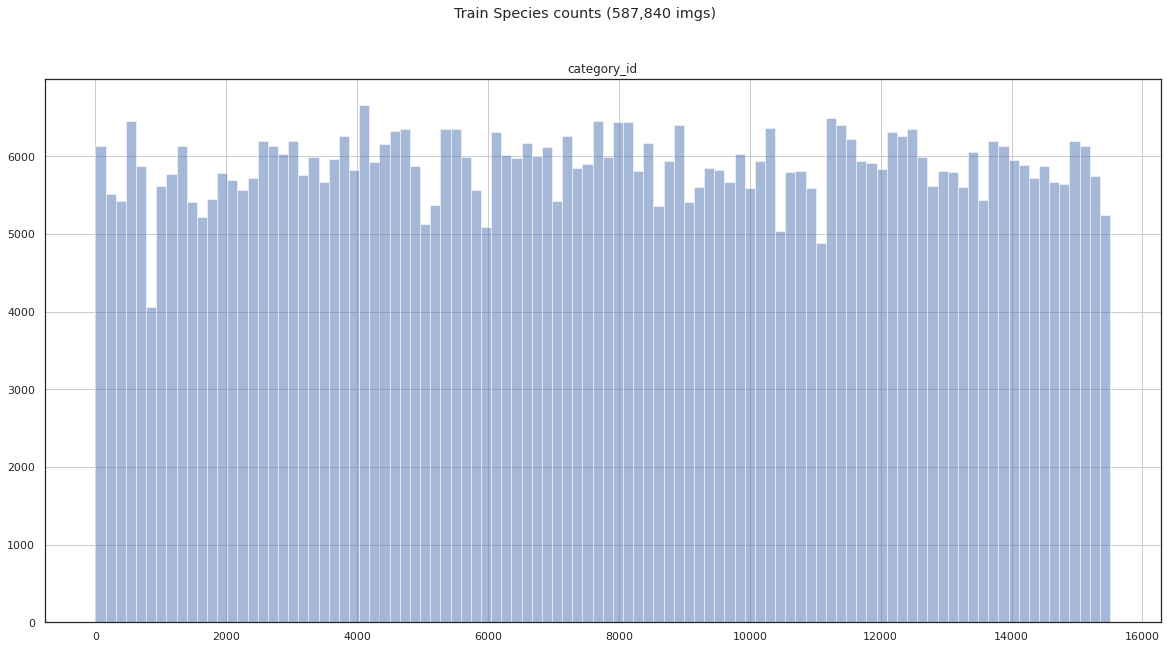

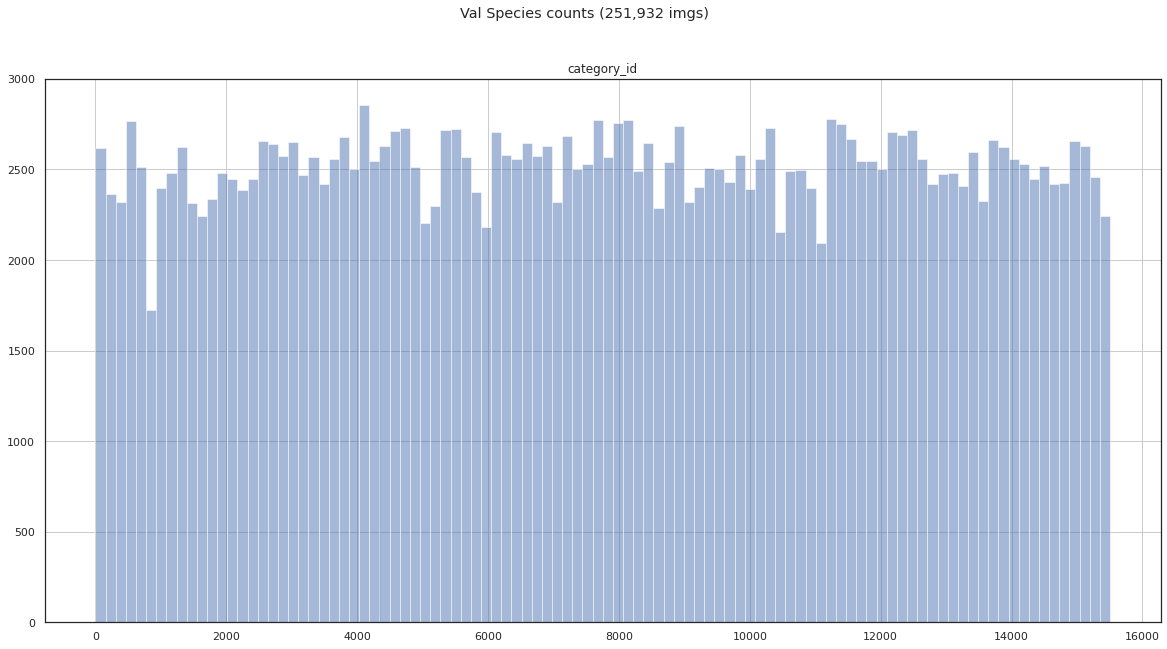

In [25]:
# plt.figure(figsize=(20,10))
train_data.hist("category_id", bins=100, figsize=(20,10), alpha=0.5)
plt.suptitle(f"Train Species counts ({train_data.shape[0]:,} imgs)")
val_data.hist("category_id", bins=100, figsize=(20,10), alpha=0.5)
plt.suptitle(f"Val Species counts ({val_data.shape[0]:,} imgs)")

In [ ]:
%%time

import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import RGBImageField, IntField

max_resolution = 960
jpeg_quality = 100

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(train_data,
                            path_col="path",
                            label_col="category_id")
write_path = f'{DATA_CACHE_DIR}/{max_resolution}/train-val-split_{train_size}/train_data.beton'
os.makedirs(os.path.dirname(write_path), exist_ok=True)

writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})
print(f"Writing the train dataset to: {write_path}")
# Write dataset

### Encapsulate serialization logic into a function

In [ ]:
%%time

import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import RGBImageField, IntField


class FFCVSerializer:
    
    def __init__(self,
                 data_df: pd.DataFrame,
                 path_col="path",
                 label_col="category_id")
    
        self.data_df = data_df
        
    
    
    
max_resolution = 960
jpeg_quality = 100

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(train_data,
                            path_col="path",
                            label_col="category_id")
write_path = f'{DATA_CACHE_DIR}/{max_resolution}/train-val-split_{train_size}/train_data.beton'
os.makedirs(os.path.dirname(write_path), exist_ok=True)

writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})
print(f"Writing the train dataset to: {write_path}")
# Write dataset

In [33]:
print(write_path)

/media/data_cifs/projects/prj_fossils/users/jacob/data/herbarium_2022/ffcv/960/train-val-split_0.7/train_data.beton


In [34]:
!ls -alh {os.path.dirname(write_path)}

total 0
drwxrwxrwx 2 cis-storage cis-storage   0 Mar  1 17:39 .
drwxrwxrwx 2 cis-storage cis-storage 512 Feb 28 11:24 ..


In [ ]:
writer.from_indexed_dataset(ds)

100%|███████████████████████████████████████████████████████████████████████████████████▊| 586340/587840 [12:56:33<02:10, 11.51it/s]

In [ ]:
%%time

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(val_data,
                            path_col="path",
                            label_col="category_id")
write_path = f'{DATA_CACHE_DIR}/{max_resolution}/train-val-split_{train_size}/val_data.beton'
os.makedirs(os.path.dirname(write_path), exist_ok=True)

writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})
print(f"Writing the train dataset to: {write_path}")
# Write dataset
writer.from_indexed_dataset(ds)



In [ ]:
output_dir = write_path = f'{DATA_CACHE_DIR}/{max_resolution}/train-val-split_{train_size}'

train_data.to_csv(os.path.join(output_dir, "train_data.csv"))
val_data.to_csv(os.path.join(output_dir, "val_data.csv"))

!ls -al {output_dir}

In [22]:
#!rm -r "/media/data/jacob/GitHub/image-utils/notebooks/herbarium_2022/data/"

In [34]:
%%time

from ffcv.loader import Loader, OrderOption
from ffcv.transforms import ToTensor, ToDevice, ToTorchImage, Cutout
from ffcv.fields.decoders import IntDecoder, RandomResizedCropRGBImageDecoder, SimpleRGBImageDecoder

from tqdm import tqdm, trange

# Random resized crop
decoder = RandomResizedCropRGBImageDecoder((512,512))

# Data decoding and augmentation
image_pipeline = [decoder, Cutout(20), ToTensor(), ToTorchImage(), ToDevice(0)]
label_pipeline = [IntDecoder(), ToTensor(), ToDevice(0)]

pipelines = {
    'image': image_pipeline,
    'label': label_pipeline
}

write_path = f'{DATA_CACHE_DIR}/General_Fossil_data-{max_resolution}.beton'

loader = Loader(write_path, batch_size=32, num_workers=4,
                order=OrderOption.RANDOM, pipelines=pipelines)

# rest of training / validation proceeds identically
load_iter = iter(loader)

for epoch in trange(len(loader)):
    batch = next(load_iter)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:06<00:00,  3.53it/s]

CPU times: user 7.22 s, sys: 216 ms, total: 7.44 s
Wall time: 7.06 s


In [19]:
grid_img = torchvision.utils.make_grid(batch[0], nrow=5)

plt.figure(figsize=(12,12))
plt.imshow(grid_img.permute(1,2,0).cpu().numpy())

# End

### Code Definitions

In [24]:
%load_ext autoreload
%autoreload 2

from pprint import pprint as pp
# import torchdatasets
# import solo
from imutils import catalog_registry

# all_densenet_models = timm.list_models('*densenet*')
# all_resnet_models = timm.list_models('*resnet*')
# pp(all_resnet_models)
# pp(all_densenet_models)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
out = catalog_registry.available_datasets.add_dataset("Extant_processed", "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/processed_edit18Jan22/outblur_Leavesdb-v1_1")
out

Added new dataset with tag: Extant_processed to root_dir: /media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/processed_edit18Jan22/outblur_Leavesdb-v1_1


In [26]:
catalog_registry.available_datasets.display_all()

{'v0_3':                    # of Variations
 Base Dataset Name                 
 PNAS                             6
 Extant                          16
 Fossil                           4,
 'v1_0':                    # of Variations
 Base Dataset Name                 
 PNAS                             6
 Extant                          24
 Fossil                           9,
 'v1_1':                    # of Variations
 Base Dataset Name                 
 PNAS                             6
 Extant                          24
 Fossil                           9,
 'extras': {'Extant_processed': '/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/processed_edit18Jan22/outblur_Leavesdb-v1_1'}}

In [ ]:
CUDA_VISIBLE_DEVICES=0,1,3,7

In [1]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from imutils.utils.dataset_management_utils import Extract


Importing imutils
ASSETS_DIR: /media/data/jacob/GitHub/image-utils/assets
SAMPLE_IMAGE_PATHS: [PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Zenobia_pulverulenta_7984 {WolfeUSGS} [1.96x].jpg'), PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Arbutus_densiflora_1440 {WolfeUSGS} [1.96x].jpg')]


In [3]:
import numpy as np

def plot_class_counts(df,
                      y_col="Family",
                      ax=None,
                      figsize=(25,10),
                      alpha: int=0.8,
                      hue: str=None,
                      ticklabel_rotation: int=40,
                      title: str=None,
                      line_color="black",
                      cmap="copper",
                      xticks=None,
                      xtick_labels=None,
                      log_yaxis: bool=False,
                      lineplot_kwargs=None,
                      **barplot_kwargs):
    
    st = datetime.now()
    print("Start:", str(st))
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
    else:
        fig = plt.gcf()
    # plt.rc('xtick', labelsize=3)
    if "normalized_cumsum" in df.columns:
        
        norm = plt.Normalize(df["count"].values.min(), df["count"].values.max())
        colors = plt.cm.get_cmap(cmap)(norm(df["count"]))
        barplot_kwargs.update({"color":colors})
        
        x = list(range(df.shape[0]))
        height = df["count"]
        if xtick_labels is None:
            xtick_labels = df[y_col].values

        # sns.barplot(x="Family", y="count", data=df, hue=hue, alpha=alpha, ax=ax, ci=None, **barplot_kwargs)
        # ax.bar(x=x, height=height, tick_label=tick_label, alpha=alpha, **barplot_kwargs)
        ax.bar(x=x, height=height, alpha=alpha, **barplot_kwargs)
        ax.set_ylabel("Class Count")
        ax.set_xlabel(f"{y_col}") 
        if log_yaxis:
            ax.set_yscale('log')
        
        bar_time = datetime.now()
        et = bar_time - st
        print("End (barplot):", 
              "Barplot only: ", str(et) + "\n",
              "Total: ", str(et) + "\n")
        
        ax2 = ax.twinx()
        lineplot_kwargs = lineplot_kwargs or {"markersize":3.0}
        if "marker" not in lineplot_kwargs:
            lineplot_kwargs.update({"marker":"o"})
        lineplot_kwargs.update(marker="o")
        # sns.lineplot(x="Family", y="normalized_cumsum", data=data_df, alpha=0.6, color=line_color, marker="o", ax=ax2, ci=None)
        ax2.plot(df["normalized_cumsum"]*100.0, alpha=0.6, color=line_color, **lineplot_kwargs) #, ax=ax2)
        ax2.set_ylabel("Normalized Cumulative Sum", color=line_color)
        plt.sca(ax2)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
        
        et2 = datetime.now() - bar_time
        total = datetime.now() - st
        print("End (lineplot):", 
              f"Lineplot only: ", str(et2) + "\n",
              f"Total: ", str(total) + "\n")
        
    else:
        sns.barplot(x=df.index, y=df.values, hue=hue, alpha=alpha, ax=ax, **barplot_kwargs)

    if isinstance(title, str):
        ax.set_title(title)
    
    
    fontsize="xx-small"
    if xticks is None:
        xticks = np.arange(0, max(x))
        fontsize="x-small"
    if len(xticks) > 75:
        resample = int(round(len(x)//75))
        # Only display every other tick label if here are too many
        # sns.set(font_scale=0.5)
        ax.set_xlabel(f"{y_col} (See appendix for complete list)")
        xticks = np.arange(0, max(x), resample)
        xtick_labels = xtick_labels[xticks]
        fontsize="xx-small"
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, 
                       rotation = ticklabel_rotation,
                       ha="right", 
                       fontsize=fontsize)

    ax.grid(axis="x", color="black", alpha=.5, linewidth=.5)
    ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    
    if ax.get_legend():
        ax.get_legend().remove()
    
    return fig, ax


def parse_filenames(data: pd.DataFrame):
    """
    Extract attributes stored as "_"-delimited sections of each sample's filename in `data` DataFrame.
    
    
    Arguments:
        data:
            Must have at least 1 column with name "path" containing absolute file paths.
            
    Return:
        data: pd.DataFrame
            Contains all original columns, as well as with new columns for each attribute, names specifed in `filename_fields` list.
    
    """
    # Named sections of structured filenames, for extracting known sample attributes
    filename_fields = ["Family","Genus","species","collection","catalog_number"]
    data = data.assign(filename = data.path.apply(lambda x: Path(x).stem),
                       path = data.path.apply(str)).convert_dtypes()
    data[filename_fields] = (
        data
        .filename.str.split("_", n=4, expand=True)
        .rename(columns={0:"Family",
                         1:"Genus",
                         2:"species",
                         3:"collection",
                         4:"catalog_number"})
    )
    data = data.assign(Species = data.apply(lambda x: " ".join([x.Genus, x.species]), axis=1))
    return data

## Load and parse datasets

In [6]:
extant_list = Extract.locate_files(EXTANT_ROOT)
general_list = Extract.locate_files(GENERAL_ROOT)
florissant_list = Extract.locate_files(FLORISSANT_ROOT)
print(
    f"extant_list: {len(extant_list['all'])}",
    f"general_list: {len(general_list['all'])}",
    f"florissant_list: {len(florissant_list['all'])}"
)

extant_df = pd.DataFrame({"path":extant_list['all']})
general_df = pd.DataFrame({"path":general_list['all']})
florissant_df = pd.DataFrame({"path":florissant_list['all']})

extant_df = parse_filenames(data=extant_df)
general_df = parse_filenames(data=general_df)
florissant_df = parse_filenames(data=florissant_df)

extant_list: 26176 general_list: 756 florissant_list: 3320


In [27]:
import torch
import torchvision
from PIL import Image


class SupervisedImageDataset(torch.utils.data.Dataset):
    def __init__(self, 
                 df: pd.DataFrame,
                 path_col: str="path",
                 label_col: str="Family"):
        self.df = df
        self.path_col = path_col
        self.label_col = label_col
        self._create_labels()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        return (
            # torchvision.transforms.functional.to_tensor(Image.open(row[self.path_col])),
            Image.open(row[self.path_col]).convert('RGB'),
            row["int_labels"],
        )
    
    def _create_labels(self):
        
        self.classnames = list(set(self.df[self.label_col]))
        print(f"Found {len(self.classnames)} unique labels")

        self.label2int = {l:i for i,l in enumerate(self.classnames)}
        self.int2label = {i:l for l,i in self.label2int.items()}
        
        self.df["int_labels"] = self.df[self.label_col].apply(lambda x: self.label2int[x])

In [ ]:
# df = general_df
# label_col = "Family"

# labels = list(set(df[label_col]))
# print(f"{len(labels)} unique labels")

# label2int = {l:i for i,l in enumerate(labels)}
# int2label = {i:l for l,i in label2int.items()}

In [14]:
%%time

import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import RGBImageField, IntField

max_resolution = 512
jpeg_quality = 100

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(general_df)
write_path = f'{DATA_CACHE_DIR}/General_Fossil_data.beton'

# Pass a type for each data field
writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})

# Write dataset
writer.from_indexed_dataset(ds)

Found 39 unique labels


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 756/756 [00:43<00:00, 17.22it/s]

CPU times: user 92 ms, sys: 228 ms, total: 320 ms
Wall time: 44.2 s


In [34]:
%%time

from ffcv.loader import Loader, OrderOption
from ffcv.transforms import ToTensor, ToDevice, ToTorchImage, Cutout
from ffcv.fields.decoders import IntDecoder, RandomResizedCropRGBImageDecoder

from tqdm import tqdm, trange

# Random resized crop
decoder = RandomResizedCropRGBImageDecoder((512,512))

# Data decoding and augmentation
image_pipeline = [decoder, Cutout(20), ToTensor(), ToTorchImage(), ToDevice(0)]
label_pipeline = [IntDecoder(), ToTensor(), ToDevice(0)]

pipelines = {
    'image': image_pipeline,
    'label': label_pipeline
}

write_path = f'{DATA_CACHE_DIR}/General_Fossil_data-{max_resolution}.beton'

loader = Loader(write_path, batch_size=32, num_workers=4,
                order=OrderOption.RANDOM, pipelines=pipelines)

# rest of training / validation proceeds identically
load_iter = iter(loader)

for epoch in trange(len(loader)):
    batch = next(load_iter)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23/23 [00:06<00:00,  3.53it/s]

CPU times: user 7.22 s, sys: 216 ms, total: 7.44 s
Wall time: 7.06 s


In [19]:
grid_img = torchvision.utils.make_grid(batch[0], nrow=5)

plt.figure(figsize=(12,12))
plt.imshow(grid_img.permute(1,2,0).cpu().numpy())

In [25]:
%%time

import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import RGBImageField, IntField

max_resolution = 512
jpeg_quality = 100

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(florissant_df)
write_path = f'{DATA_CACHE_DIR}/Florissant_Fossil_data-{max_resolution}.beton'

# Pass a type for each data field
writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})

# Write dataset
writer.from_indexed_dataset(ds)

Found 23 unique labels


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3320/3320 [03:55<00:00, 14.11it/s]

CPU times: user 324 ms, sys: 1.58 s, total: 1.91 s
Wall time: 3min 56s


In [33]:
%%time

from ffcv.loader import Loader, OrderOption
from ffcv.transforms import ToTensor, ToDevice, ToTorchImage, Cutout
from ffcv.fields.decoders import IntDecoder, RandomResizedCropRGBImageDecoder

from tqdm import tqdm, trange

# Random resized crop
decoder = RandomResizedCropRGBImageDecoder((512,512))

# Data decoding and augmentation
image_pipeline = [decoder, Cutout(20), ToTensor(), ToTorchImage(), ToDevice(0)]
label_pipeline = [IntDecoder(), ToTensor(), ToDevice(0)]

pipelines = {
    'image': image_pipeline,
    'label': label_pipeline
}

write_path = f'{DATA_CACHE_DIR}/Florissant_Fossil_data-{max_resolution}.beton'

loader = Loader(write_path, batch_size=32, num_workers=4,
                order=OrderOption.RANDOM, pipelines=pipelines)

# rest of training / validation proceeds identically
load_iter = iter(loader)

for epoch in trange(len(loader)):
    batch = next(load_iter)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:08<00:00, 12.08it/s]

CPU times: user 10.6 s, sys: 1.12 s, total: 11.7 s
Wall time: 9.12 s


In [28]:
%%time

import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import RGBImageField, IntField

max_resolution = 512
jpeg_quality = 100

# Your dataset (`torch.utils.data.Dataset`) of (image, label) pairs
ds = SupervisedImageDataset(extant_df)
write_path = f'{DATA_CACHE_DIR}/Extant_Leaves_data-{max_resolution}.beton'

# Pass a type for each data field
writer = DatasetWriter(write_path, {
    # Tune options to optimize dataset size, throughput at train-time
    'image': RGBImageField(max_resolution=max_resolution, jpeg_quality=jpeg_quality),
    'label': IntField()
})

# Write dataset
writer.from_indexed_dataset(ds)

Found 354 unique labels



 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 20800/26176 [09:24<01:19, 67.55it/s]DecompressionBombWarning: Image size (97228460 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 21300/26176 [09:48<02:27, 32.99it/s]DecompressionBombWarning: Image size (106021165 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 23800/26176 [10:50<00:29, 81.90it/s]DecompressionBombWarning: Image size (99645408 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

 92%|████████████████████████████████████

CPU times: user 1.84 s, sys: 2.17 s, total: 4.01 s
Wall time: 12min 9s


In [38]:
from ffcv.loader import Loader, OrderOption
from ffcv.transforms import ToTensor, ToDevice, ToTorchImage, Cutout
from ffcv.fields.decoders import IntDecoder, RandomResizedCropRGBImageDecoder

from tqdm import tqdm, trange

# Random resized crop
decoder = RandomResizedCropRGBImageDecoder((512,512))

# Data decoding and augmentation
image_pipeline = [decoder, Cutout(1), ToTensor(), ToTorchImage(), ToDevice(0)]
label_pipeline = [IntDecoder(), ToTensor(), ToDevice(0)]

pipelines = {
    'image': image_pipeline,
    'label': label_pipeline
}

write_path = f'{DATA_CACHE_DIR}/Extant_Leaves_data-{max_resolution}.beton'

# Replaces PyTorch data loader (`torch.utils.data.Dataloader`)
loader = Loader(write_path, batch_size=32, num_workers=4,
                order=OrderOption.RANDOM, pipelines=pipelines)

# rest of training / validation proceeds identically
load_iter = iter(loader)

for epoch in trange(len(loader)):
    batch = next(load_iter)
    break


  0%|                                                                                                                                                                | 0/818 [00:05<?, ?it/s]


In [43]:
import numba
numba.__version__

'0.55.1'

<Figure size 864x864 with 0 Axes>

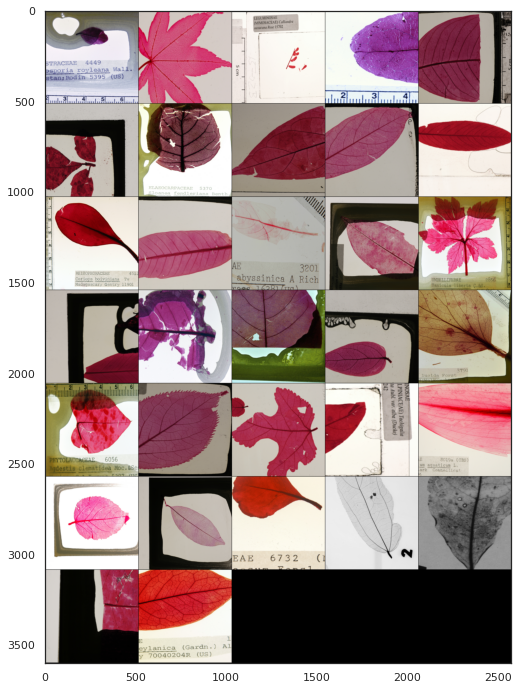

In [39]:
grid_img = torchvision.utils.make_grid(batch[0], nrow=5)

plt.figure(figsize=(12,12))
plt.imshow(grid_img.permute(1,2,0).cpu().numpy())

In [14]:
import cv2

help(cv2.imencode)

Help on built-in function imencode:

imencode(...)
    imencode(ext, img[, params]) -> retval, buf
    .   @brief Encodes an image into a memory buffer.
    .   
    .   The function imencode compresses the image and stores it in the memory buffer that is resized to fit the
    .   result. See cv::imwrite for the list of supported formats and flags description.
    .   
    .   @param ext File extension that defines the output format.
    .   @param img Image to be written.
    .   @param buf Output buffer resized to fit the compressed image.
    .   @param params Format-specific parameters. See cv::imwrite and cv::ImwriteFlags.



### Test a single plot

In [39]:
import os
from pprint import pprint as pp

PNAS_leaf_classes = [
     'Anacardiaceae',
     'Annonaceae',
     'Apocynaceae',
     'Betulaceae',
     'Celastraceae',
     'Combretaceae',
     'Ericaceae',
     'Fabaceae',
     'Fagaceae',
     'Lauraceae',
     'Malvaceae',
     'Melastomataceae',
     'Myrtaceae',
     'Passifloraceae',
     'Phyllanthaceae',
     'Rosaceae',
     'Rubiaceae',
     'Salicaceae',
     'Sapindaceae'
                      ]
# sorted(PNAS_leaf_classes)

classnames_path = Path(OUTPUT_DIR, "PNAS_19-Family_classnames.csv")
if not os.path.isfile(classnames_path):
    
    df = pd.DataFrame(
        PNAS_leaf_classes, 
        index=range(len(PNAS_leaf_classes))
                     )
    
    df.to_csv(classnames_path, index=False)
    print(f"Wrote {len(df)} Family names from PNAS Leaves to {classnames_path}")
    pp(PNAS_leaf_classes)
# classnames_path

Wrote 19 Family names from PNAS Leaves to /media/data/jacob/GitHub/image-utils/notebooks/plots/PNAS_19-Family_classnames.csv
['Anacardiaceae',
 'Annonaceae',
 'Apocynaceae',
 'Betulaceae',
 'Celastraceae',
 'Combretaceae',
 'Ericaceae',
 'Fabaceae',
 'Fagaceae',
 'Lauraceae',
 'Malvaceae',
 'Melastomataceae',
 'Myrtaceae',
 'Passifloraceae',
 'Phyllanthaceae',
 'Rosaceae',
 'Rubiaceae',
 'Salicaceae',
 'Sapindaceae']


In [15]:
style = "dark" # 'seaborn-notebook'
cmap = "Spectral" #"gist_stern_r"
context = "notebook"
# plt.style.use(style)
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})

sns.set_context(context)
sns.set_style(style)
sns.set_palette(sns.color_palette("mako"))

In [16]:
catalog_path = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0-patch_2/catalogs/full_catalog-v1.0-patch.2--12_20_21.csv"

df = pd.read_csv(catalog_path, index_col=0)

In [ ]:
sns.countplot(data=df, x="Family", color="blue", alpha=0.8, linewidth=0, order=df.value_counts("Family").index) # multiple='stack', log_scale=(False,True),cumulative=True)
# hue="data_subset",


plt.gca().set_xticks([])
# ax.set_xticklabels(tick_label[xticks], 
#                    rotation = ticklabel_rotation,
#                    ha="right", 
#                    fontsize=fontsize)



plt.figure(figsize=(25,10))


data = df.groupby("Family").nunique()

# fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.histplot(data=df, hue="collection", x="Genus", multiple="stack", discrete=True, legend=None)#, log_scale=True)#, alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, 
# sns.jointplot(data=data, x="Genus", y="Species", alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, log_scale=True) #, kind='hist')#, figsize=(20,10))

# ax = plt.gca()
# ax.set_yscale("log")
# ax.set_xscale("log")





<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

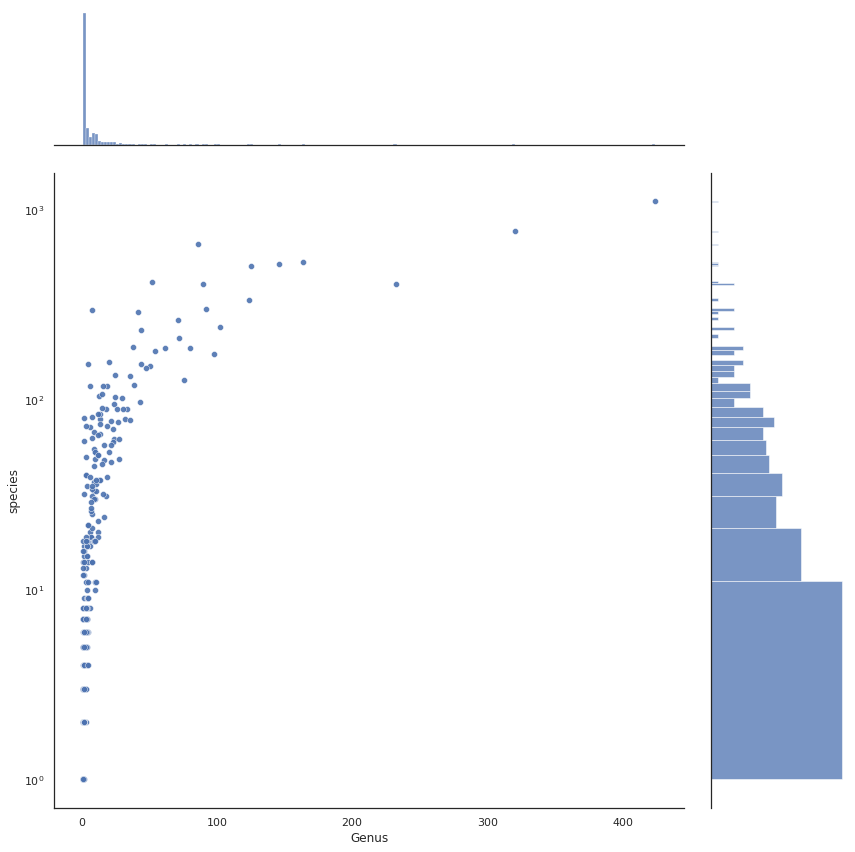

In [31]:
plt.figure(figsize=(25,10))


data = df.groupby("Family").nunique()

# fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.jointplot(data=data, x="Genus", y="species", alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, log_scale=True) #, kind='hist')#, figsize=(20,10))

ax = plt.gca()
ax.set_yscale("log")
ax.set_xscale("log")

In [20]:
dsets = [extant_df,
    general_df,
    florissant_df]

taxon_cols = ['Family', 'Genus', 'species', 'collection', 'catalog_number', 'Species']

for col in taxon_cols:
    for df in dsets:
        gb = df.groupby(col)
        
        gb.ngroups
        df.describe(include='all')
        break
    break
gb

354

,path,filename,Family,Genus,species,collection,catalog_number,Species
count,26176,26176,26176,26176,26176,26176,26176,26176
unique,26176,26176,354,4573,7807,4,26176,17389
top,/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/original/full/jpg/Trochodendraceae/Trochodendraceae_Tetracentron_sinense_Wolfe_Wolfe_514.jpg,Trochodendraceae_Tetracentron_sinense_Wolfe_Wolfe_514,Fabaceae,Quercus,sp,Wolfe,Wolfe_514,Hymenaea courbaril
freq,1,1,2301,395,124,16249,1,42


In [34]:
styles = ['seaborn-dark',
    'seaborn-darkgrid',
    'seaborn-ticks',
    'fivethirtyeight',
    'seaborn-whitegrid',
    'classic',
    '_classic_test',
    'seaborn-talk',
    'seaborn-dark-palette',
    'seaborn-bright',
    'seaborn-pastel',
    'grayscale',
    'seaborn-notebook',
    'ggplot',
    'seaborn-colorblind',
    'seaborn-muted',
    'seaborn',
    'seaborn-paper',
    'bmh',
    'seaborn-white',
    'dark_background',
    'seaborn-poster',
    'seaborn-deep'
         ]

style = 'seaborn-notebook'
cmap = "Spectral" #"gist_stern_r"
plt.style.use(style)


# plt.figure(figsize=(25,10))
# def plot_groupby_hist(df: pd.DataFrame,
#                       )

# gb[["Genus", "species"]].nunique().hist(ax=plt.gca(), bins=100, alpha=0.8)

In [ ]:
def categorical_order(values, order=None):
    """Return a list of unique data values.

    Determine an ordered list of levels in ``values``.

    Parameters
    ----------
    values : list, array, Categorical, or Series
        Vector of "categorical" values
    order : list-like, optional
        Desired order of category levels to override the order determined
        from the ``values`` object.

    Returns
    -------
    order : list
        Ordered list of category levels

    """
    if order is None:
        if hasattr(values, "categories"):
            order = values.categories
        else:
            try:
                order = values.cat.categories
            except (TypeError, AttributeError):
                try:
                    order = values.unique()
                except AttributeError:
                    order = pd.unique(values)

    return list(order)


In [8]:
# # sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

# context = "paper"
# sns.set_context(context)
# style = "dark" # "darkgrid"
# sns.set_style(style)
# sns.set_palette(
#     sns.color_palette("mako")
# )

# y_col = "Family"
# barplot_kwargs = {
#     "edgecolor":"black",
#     "linewidth":1.0,
#     "width":0.9
#     # "width":0.8,
#     # "dodge":False,
#     # "saturation":0.5
# }

# """Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# """

# styles = ['seaborn-dark',
#     'seaborn-darkgrid',
#     'seaborn-ticks',
#     'fivethirtyeight',
#     'seaborn-whitegrid',
#     'classic',
#     '_classic_test',
#     'seaborn-talk',
#     'seaborn-dark-palette',
#     'seaborn-bright',
#     'seaborn-pastel',
#     'grayscale',
#     'seaborn-notebook',
#     'ggplot',
#     'seaborn-colorblind',
#     'seaborn-muted',
#     'seaborn',
#     'seaborn-paper',
#     'bmh',
#     'seaborn-white',
#     'dark_background',
#     'seaborn-poster',
#     'seaborn-deep'
#          ]

# df = florissant_df
# df = general_df
# df = extant_df
# name="florissant"
# name="general"
# name="extant"

# style = styles[8]
# cmap = "Spectral" #"gist_stern_r"
# print(f"Using style: {style}, cmap: {cmap}")
# plt.style.use(style)

# num_samples = df.shape[0]
# data_df = (
#     pd.DataFrame(
#         {"count":df.value_counts(y_col),
#          "normalized_cumsum":df.value_counts(y_col).cumsum()/num_samples})
#     .reset_index(drop=False)
# )

# fig, ax = plot_class_counts(data_df,
#                             y_col=y_col,
#                             ax=None,
#                             figsize=(20,10),
#                             hue="normalized_cumsum",
#                             alpha=0.6,
#                             ticklabel_rotation=40,
#                             cmap=cmap,
#                             title=name + f" {y_col} Distribution",
#                             **barplot_kwargs)

# %time plt.savefig(f"{name}-test_image.png")
# %time plt.savefig(f"{name}-test_image.svg")

## Create plots

In [10]:
# %load_ext snakeviz
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

# sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})

# context = "paper"
# sns.set_context(context)
# style = "darkgrid"
# sns.set_style(style)
# sns.set_palette(
#     sns.color_palette("mako")
# )

# y_col = "Family"
# barplot_kwargs = {
#     # "width":0.8,
#     # "dodge":False,
#     # "saturation":0.5
# }

# plt.style.use('fivethirtyeight')

# df = data_df
# norm = plt.Normalize(df["count"].values.min(), df["count"].values.max())
# colors = plt.cm.copper_r(norm(df["count"])) 
# # barplot_kwargs.update({"palette":colors})
# colors

In [22]:
%load_ext snakeviz
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})

context = "paper"
sns.set_context(context)
style = "dark" # "darkgrid"
sns.set_style(style)
sns.set_palette(
    sns.color_palette("mako")
)

# y_col = "Family"
barplot_kwargs = {
    "edgecolor":"black",
    "linewidth":0.5,
    "width":0.9
    # "width":0.8,
    # "dodge":False,
    # "saturation":0.5
}

styles = ['seaborn-dark',
    'seaborn-darkgrid',
    'seaborn-ticks',
    'fivethirtyeight',
    'seaborn-whitegrid',
    'classic',
    '_classic_test',
    'seaborn-talk',
    'seaborn-dark-palette',
    'seaborn-bright',
    'seaborn-pastel',
    'grayscale',
    'seaborn-notebook',
    'ggplot',
    'seaborn-colorblind',
    'seaborn-muted',
    'seaborn',
    'seaborn-paper',
    'bmh',
    'seaborn-white',
    'dark_background',
    'seaborn-poster',
    'seaborn-deep'
         ]

style = styles[8]
cmap = "Spectral" #"gist_stern_r"
print(f"Using style: {style}, cmap: {cmap}")
plt.style.use(style)

Using style: seaborn-dark-palette, cmap: Spectral


Start: 2022-02-07 10:42:48.297245
End (barplot): Barplot only:  0:00:00.403809
 Total:  0:00:00.403809

End (lineplot): Lineplot only:  0:00:00.023015
 Total:  0:00:00.426829

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/Extant Leaves-Family_Counts-x-CumSum.svg
Start: 2022-02-07 10:42:49.977584
End (barplot): Barplot only:  0:00:00.065121
 Total:  0:00:00.065121

End (lineplot): Lineplot only:  0:00:00.022920
 Total:  0:00:00.088045

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/General Fossils-Family_Counts-x-CumSum.svg
Start: 2022-02-07 10:42:50.689738
End (barplot): Barplot only:  0:00:00.050049
 Total:  0:00:00.050049

End (lineplot): Lineplot only:  0:00:00.024707
 Total:  0:00:00.074760

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/Florissant Fossils-Family_Counts-x-CumSum.svg


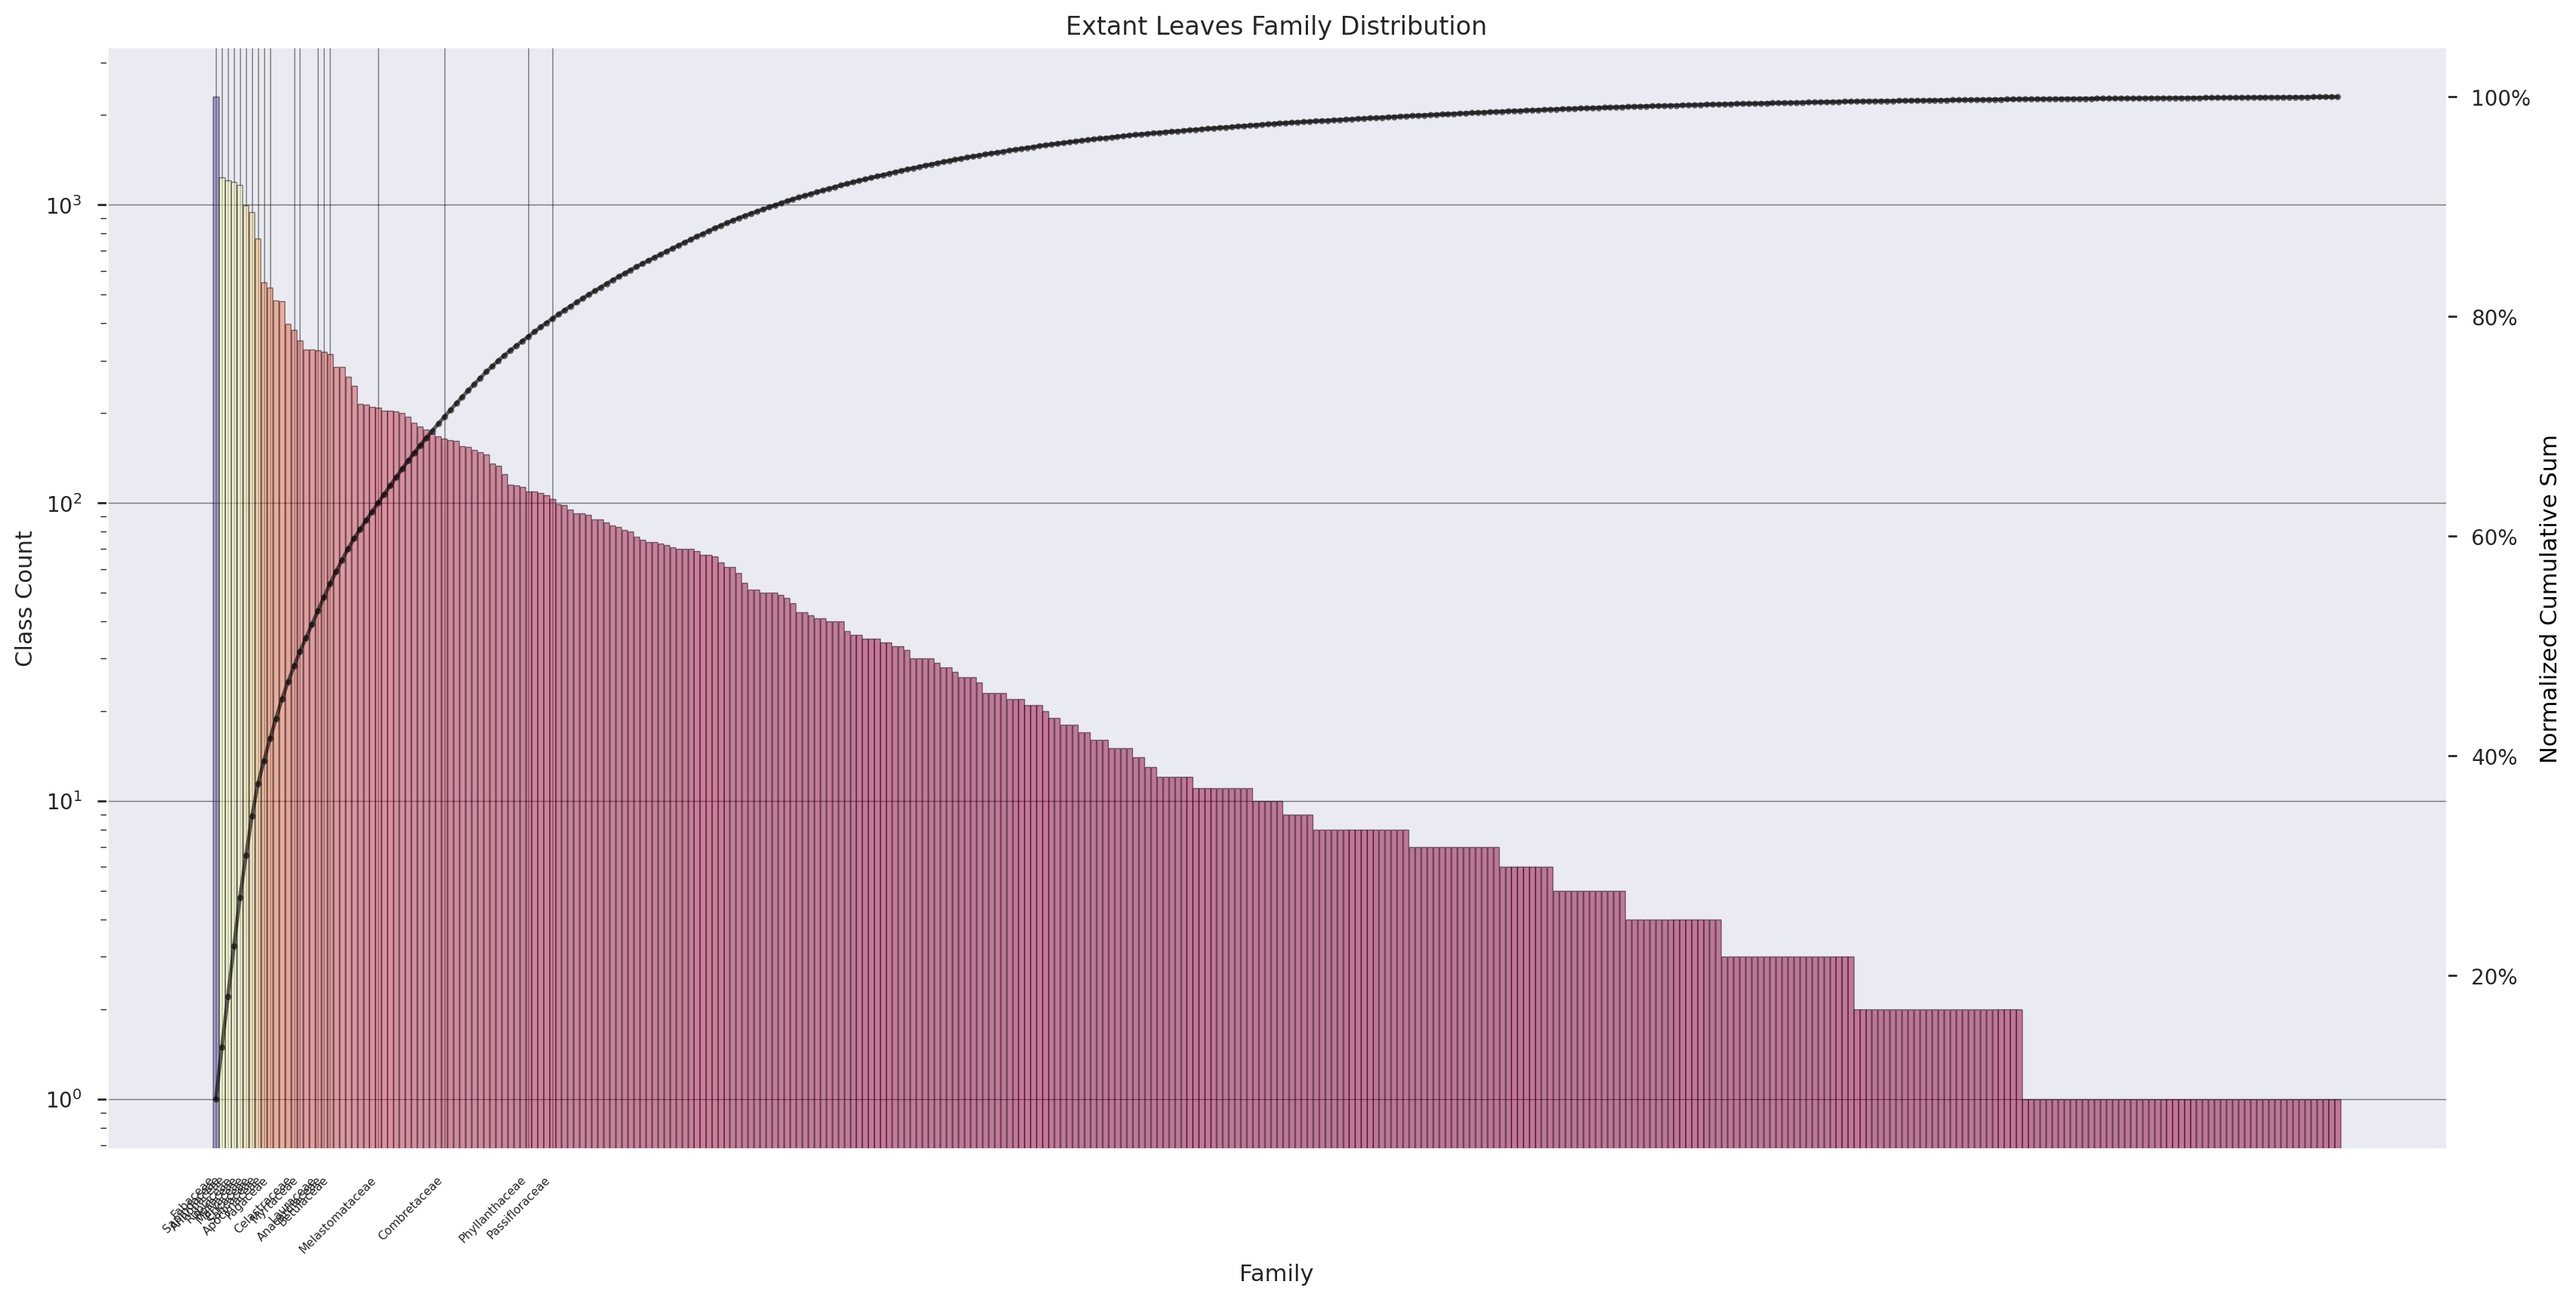

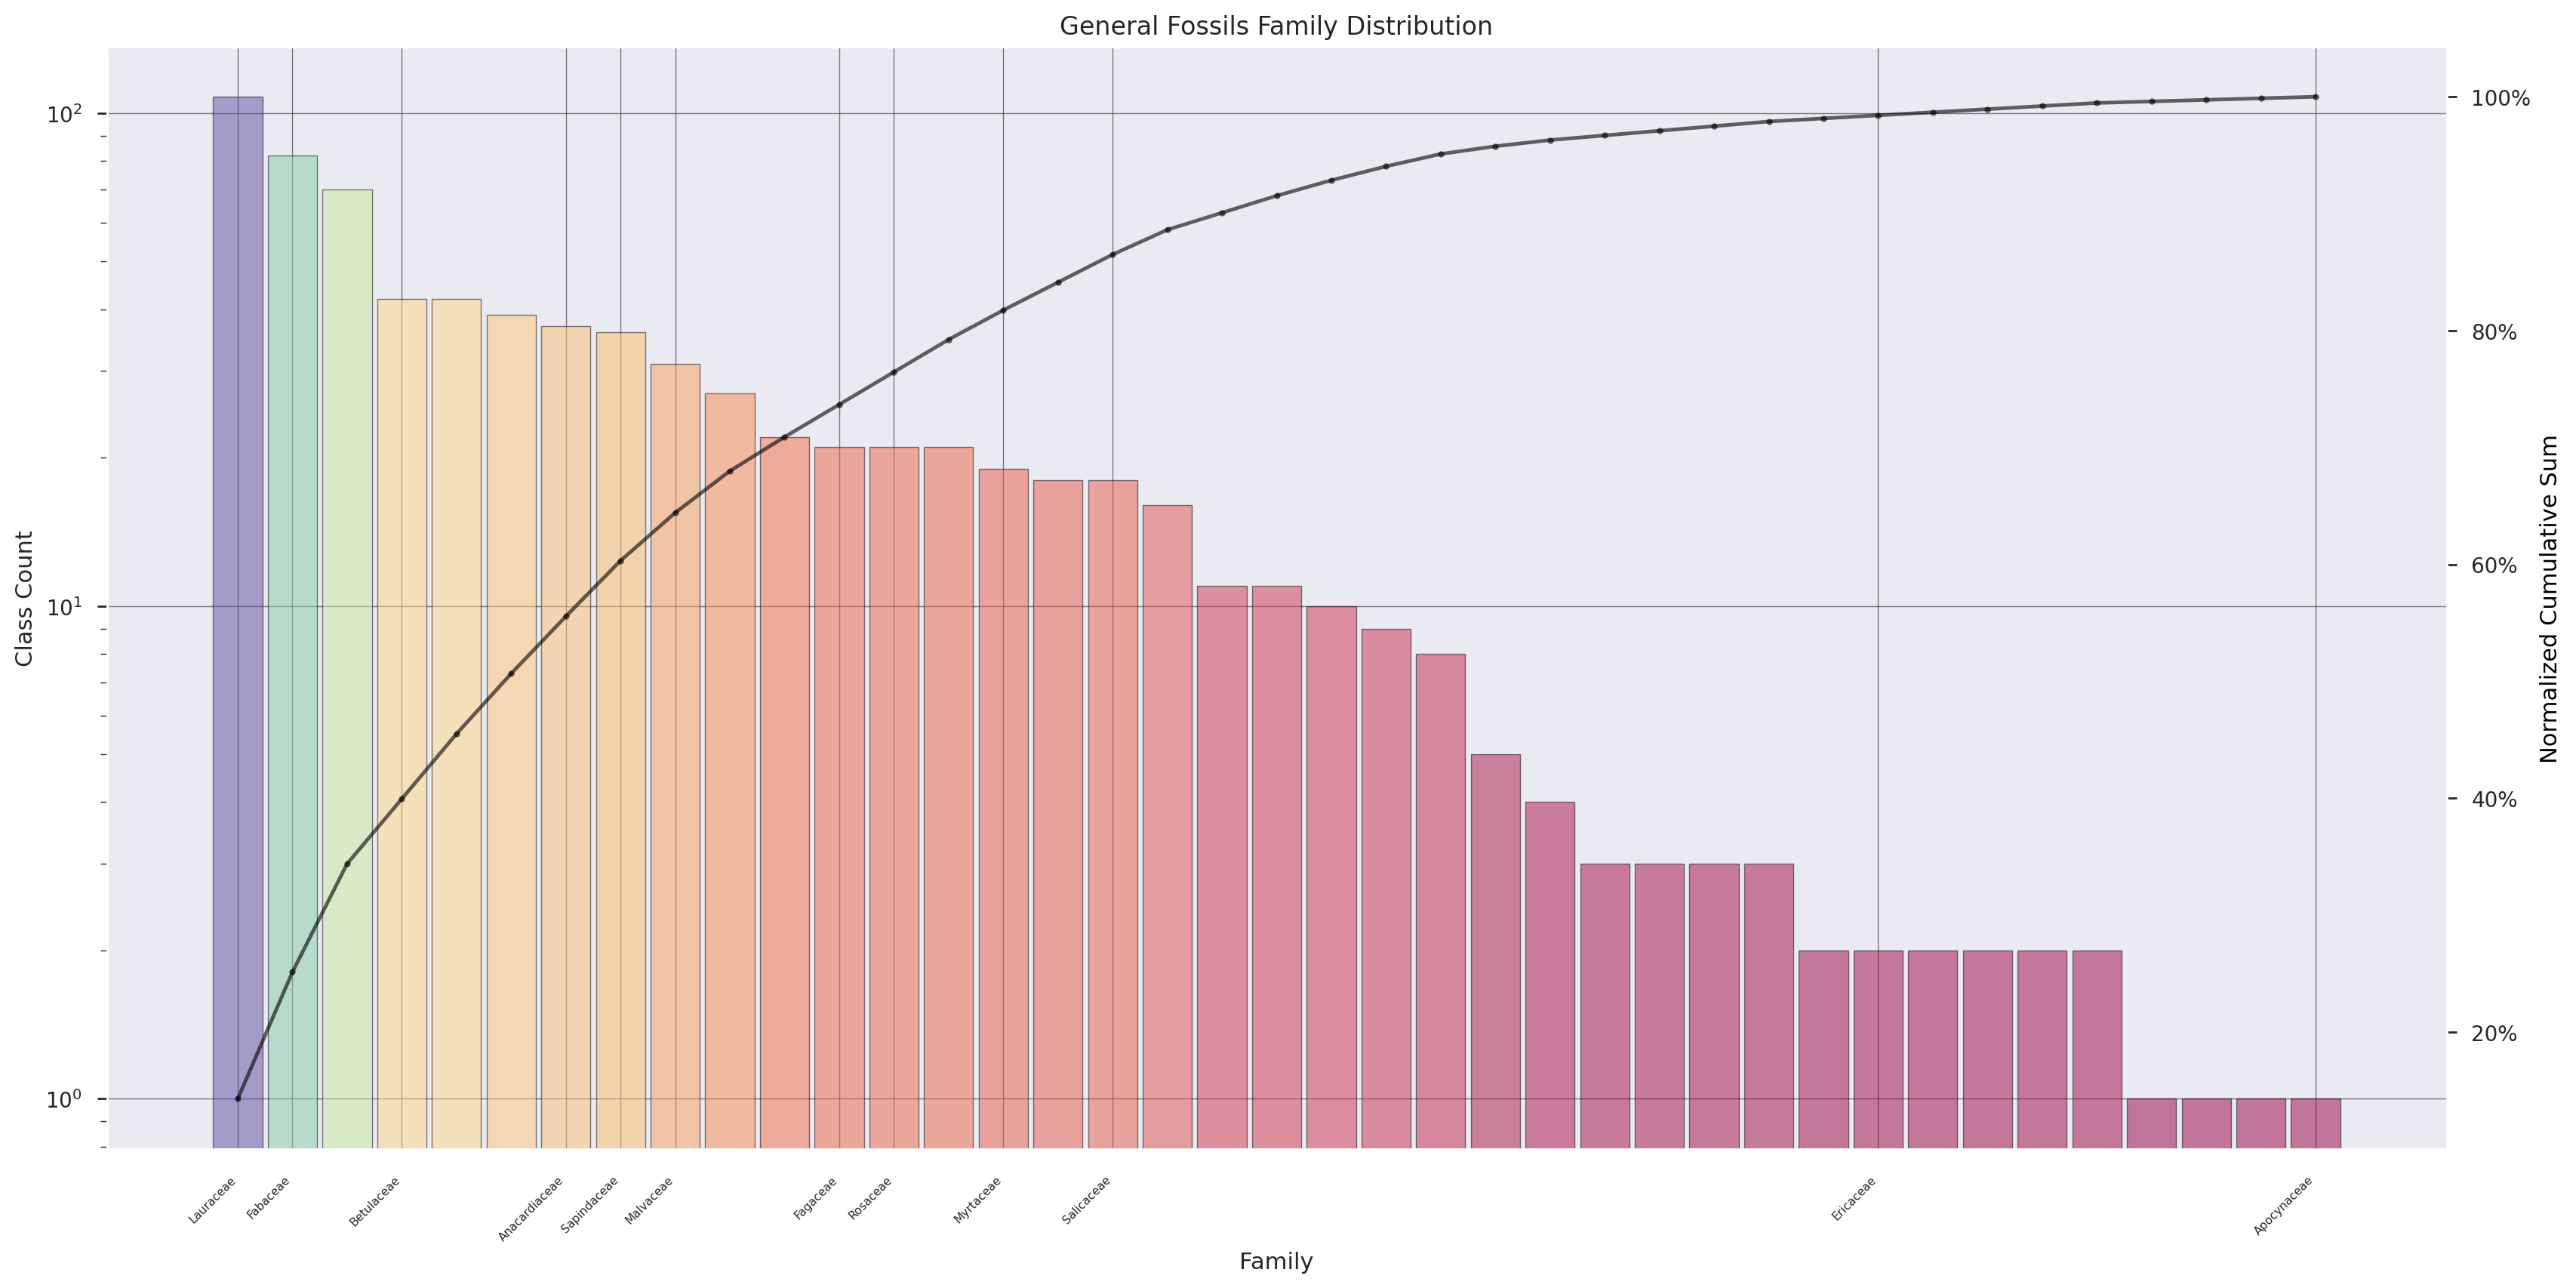

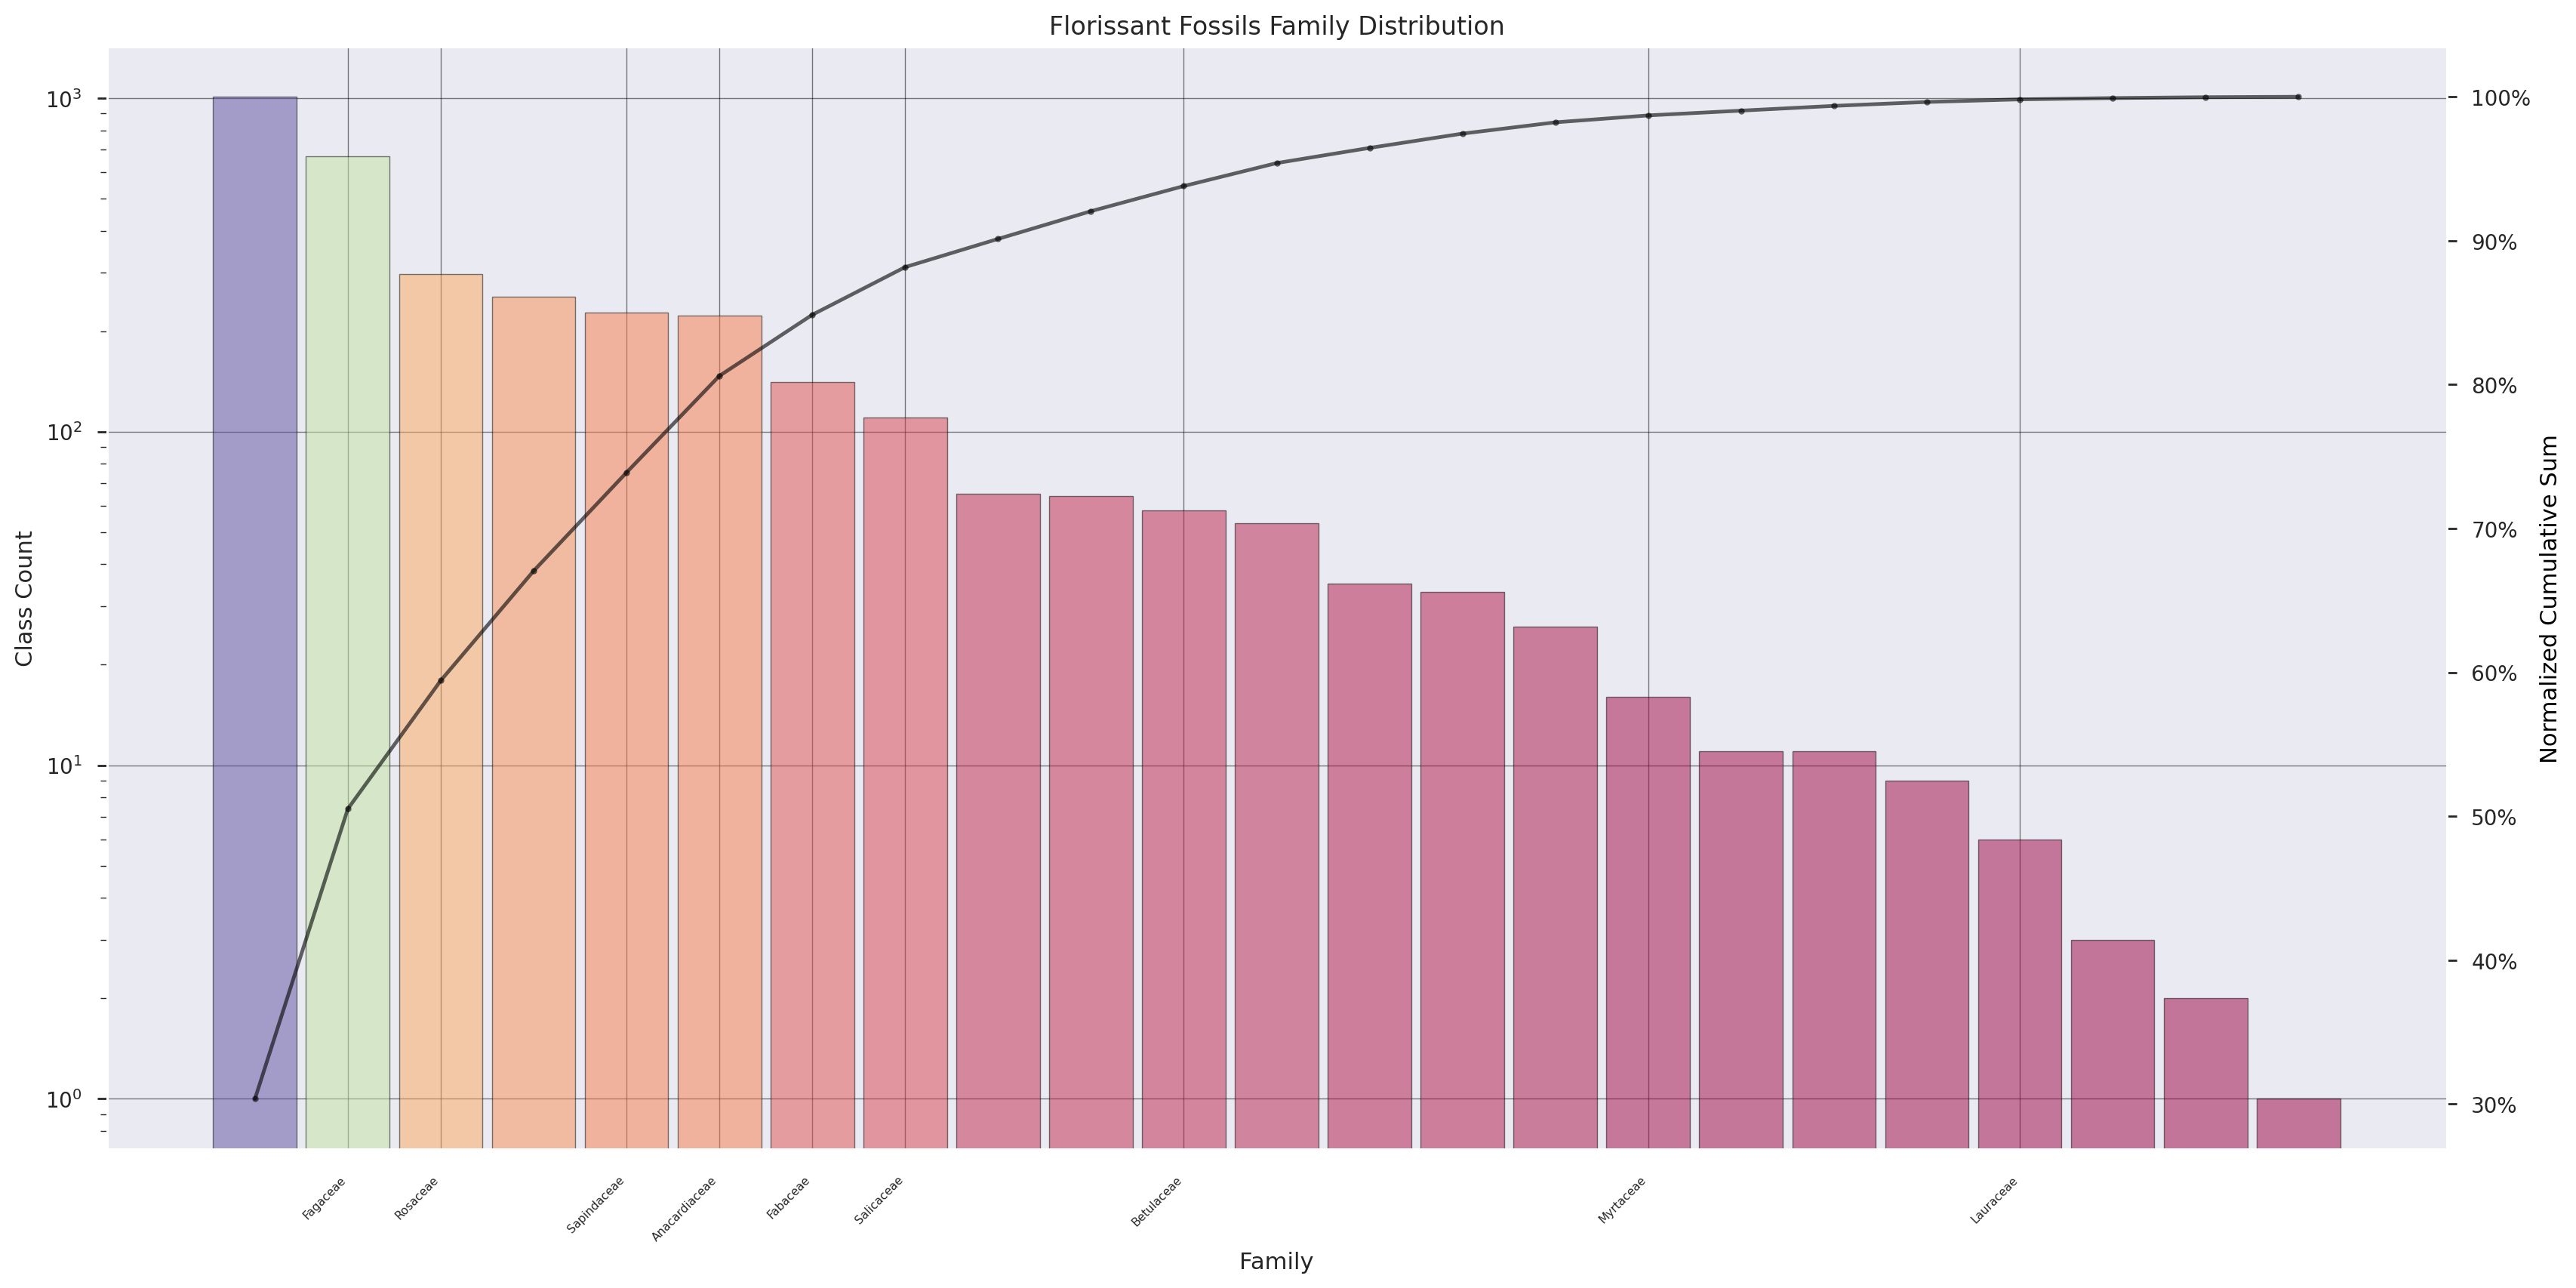

In [55]:
# %%snakeviz
lineplot_kwargs = {"markersize":3.0}

for y_col in ["Family"]: # , "Genus", "Species"]:
    for name, df in zip(
        ["Extant Leaves", "General Fossils", "Florissant Fossils"], # [::-1],
        [extant_df, general_df, florissant_df] # [::-1]
    ):
        
        # y_col="Species"
        # name="Extant Leaves"
        # df=extant_df
        
        num_samples = df.shape[0]
        data_df = (
            pd.DataFrame(
                {"count":df.value_counts(y_col),
                 "normalized_cumsum":df.value_counts(y_col).cumsum()/num_samples})
            .reset_index(drop=False)
        )
        
        xticks_df = data_df[data_df.Family.isin(PNAS_leaf_classes)]
        xticks, xtick_labels = list(xticks_df.index), list(xticks_df.Family)

        fig, ax = plot_class_counts(data_df,
                                    y_col=y_col,
                                    ax=None,
                                    figsize=(20,10),
                                    hue="normalized_cumsum",
                                    alpha=0.5,
                                    ticklabel_rotation=45,
                                    cmap=cmap,
                                    title=name + f" {y_col} Distribution",
                                    xticks=xticks,
                                    xtick_labels=xtick_labels,
                                    log_yaxis=True,
                                    lineplot_kwargs=lineplot_kwargs,
                                    **barplot_kwargs)
        
        
        fig.subplots_adjust(bottom=0.15)
        filepath = Path(OUTPUT_DIR, name + f"-{y_col}_Counts-x-CumSum" + ".svg")
        plt.savefig(filepath) #, bbox_inches="tight")
        print(f"Saved: {filepath}")
        data_table_path = Path(OUTPUT_DIR, name + f"-{y_col}_Counts-x-CumSum_table" + ".csv")
        data_df.to_csv(data_table_path)
        # break
    # break